In [101]:
import pandas as pd
df= pd.read_csv(r"C:\Users\Access\Documents\AI ROBOT\XAUUSD_Candlestick_1_M_BID_2020-1-1_2024-12-31.csv")

In [102]:
df

Gmt time      Open      High       Low     Close  Volume
0        2020-01-01 00:00:00  1516.915  1516.915  1516.915  1516.915     0.0
1        2020-01-01 00:01:00  1516.915  1516.915  1516.915  1516.915     0.0
2        2020-01-01 00:02:00  1516.915  1516.915  1516.915  1516.915     0.0
3        2020-01-01 00:03:00  1516.915  1516.915  1516.915  1516.915     0.0
4        2020-01-01 00:04:00  1516.915  1516.915  1516.915  1516.915     0.0
...                      ...       ...       ...       ...       ...     ...
2373724  2024-12-31 23:55:00  2624.255  2624.255  2624.255  2624.255     0.0
2373725  2024-12-31 23:56:00  2624.255  2624.255  2624.255  2624.255     0.0
2373726  2024-12-31 23:57:00  2624.255  2624.255  2624.255  2624.255     0.0
2373727  2024-12-31 23:58:00  2624.255  2624.255  2624.255  2624.255     0.0
2373728  2024-12-31 23:59:00  2624.255  2624.255  2624.255  2624.255     0.0

[2373729 rows x 6 columns]

In [103]:
df.columns

Index(['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [104]:
import pandas as pd

# --- دالة تجميع إلى 15 دقيقة ---
def resample_to_15min(df):
    df['Gmt time'] = pd.to_datetime(df['Gmt time'])
    df.set_index('Gmt time', inplace=True)

    df_15min = df.resample('15T').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    }).dropna()

    df_15min.reset_index(inplace=True)
    return df_15min

# --- دالة Heikin Ashi ---
def heikin_ashi(df):
    ha_df = pd.DataFrame()
    ha_df['Gmt time'] = df['Gmt time']
    ha_df['Close'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

    ha_open = [(df['Open'].iloc[0] + df['Close'].iloc[0]) / 2]
    for i in range(1, len(df)):
        ha_open.append((ha_open[i - 1] + ha_df['Close'].iloc[i - 1]) / 2)

    ha_df['Open'] = ha_open
    ha_df['High'] = pd.concat([df['High'], ha_df['Open'], ha_df['Close']], axis=1).max(axis=1)
    ha_df['Low'] = pd.concat([df['Low'], ha_df['Open'], ha_df['Close']], axis=1).min(axis=1)
    ha_df['Volume'] = df['Volume']
    return ha_df[['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume']]

# --- تشغيل الخطوات ---
df_15min = resample_to_15min(df)
ha_df = heikin_ashi(df_15min)

# --- طباعة النتيجة ---
print(ha_df.head(10))  # اطبع أول 10 صفوف


C:\Users\Access\AppData\Local\Temp\ipykernel_13308\1745613486.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_15min = df.resample('15T').agg({


             Gmt time      Open      High       Low     Close  Volume
0 2020-01-01 00:00:00  1516.915  1516.915  1516.915  1516.915     0.0
1 2020-01-01 00:15:00  1516.915  1516.915  1516.915  1516.915     0.0
2 2020-01-01 00:30:00  1516.915  1516.915  1516.915  1516.915     0.0
3 2020-01-01 00:45:00  1516.915  1516.915  1516.915  1516.915     0.0
4 2020-01-01 01:00:00  1516.915  1516.915  1516.915  1516.915     0.0
5 2020-01-01 01:15:00  1516.915  1516.915  1516.915  1516.915     0.0
6 2020-01-01 01:30:00  1516.915  1516.915  1516.915  1516.915     0.0
7 2020-01-01 01:45:00  1516.915  1516.915  1516.915  1516.915     0.0
8 2020-01-01 02:00:00  1516.915  1516.915  1516.915  1516.915     0.0
9 2020-01-01 02:15:00  1516.915  1516.915  1516.915  1516.915     0.0


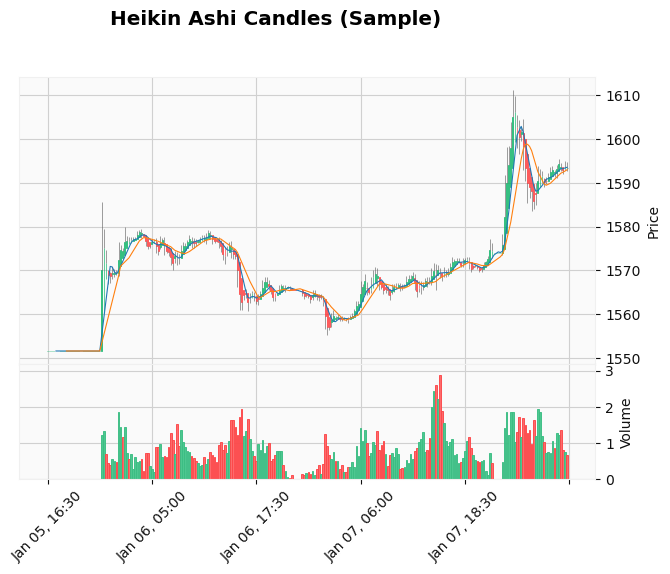

In [105]:
import mplfinance as mpf

# --- تأكد أن Gmt time هو الفهرس ---
ha_df_plot = ha_df[450:700].copy()  # جزء من البيانات
ha_df_plot['Gmt time'] = pd.to_datetime(ha_df_plot['Gmt time'])
ha_df_plot.set_index('Gmt time', inplace=True)

# --- إعادة تسمية الأعمدة لتتوافق مع تنسيق mplfinance ---
ha_df_plot.rename(columns={
    'Open': 'Open',
    'High': 'High',
    'Low': 'Low',
    'Close': 'Close',
    'Volume': 'Volume'
}, inplace=True)

# --- رسم الشموع ---
mpf.plot(ha_df_plot, type='candle', style='yahoo', volume=True, title='Heikin Ashi Candles (Sample)', mav=(5,10))


In [106]:
ha_df

Gmt time         Open      High          Low     Close  \
0      2020-01-01 00:00:00  1516.915000  1516.915  1516.915000  1516.915   
1      2020-01-01 00:15:00  1516.915000  1516.915  1516.915000  1516.915   
2      2020-01-01 00:30:00  1516.915000  1516.915  1516.915000  1516.915   
3      2020-01-01 00:45:00  1516.915000  1516.915  1516.915000  1516.915   
4      2020-01-01 01:00:00  1516.915000  1516.915  1516.915000  1516.915   
...                    ...          ...       ...          ...       ...   
158248 2024-12-31 22:45:00  2624.227034  2624.255  2624.227034  2624.255   
158249 2024-12-31 23:00:00  2624.241017  2624.255  2624.241017  2624.255   
158250 2024-12-31 23:15:00  2624.248008  2624.255  2624.248008  2624.255   
158251 2024-12-31 23:30:00  2624.251504  2624.255  2624.251504  2624.255   
158252 2024-12-31 23:45:00  2624.253252  2624.255  2624.253252  2624.255   

        Volume  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
...        ...  
158248     0.0  
158249     0.0  
158250     0.0  
158251     0.0  
158252     0.0  

[158253 rows x 6 columns]

In [107]:
ha_df.columns

Index(['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [108]:
def generate_signals_no_price_retrace(df, steps_ahead=3, min_target_ratio=0.0004):
    """
    توليد إشارات بدون انعكاس سعري وبهدف سعري أدنى من قيمة محددة (نسبة)
    - min_target_ratio: النسبة الدنيا للربح مقارنة بسعر الدخول، مثال 0.0015 = 0.15%
    """
    signals = []
    close = df['Close'].values
    high = df['High'].values
    low = df['Low'].values
    times = pd.to_datetime(df['Gmt time']).values

    for i in range(len(df) - steps_ahead):
        entry_price = close[i]
        entry_day = pd.to_datetime(times[i]).date()
        future_day = pd.to_datetime(times[i + steps_ahead]).date()

        # لا نسمح بتجاوز اليوم
        if entry_day != future_day:
            signals.append(0)
            continue

        future_close = close[i + steps_ahead]

        # إشارة شراء (صعود بدون هبوط)
        if future_close > entry_price:
            price_gain = future_close - entry_price
            min_low = low[i+1 : i+steps_ahead+1].min()
            if min_low >= entry_price and price_gain >= entry_price * min_target_ratio:
                signals.append(1)
                continue

        # إشارة بيع (هبوط بدون صعود)
        elif future_close < entry_price:
            price_gain = entry_price - future_close
            max_high = high[i+1 : i+steps_ahead+1].max()
            if max_high <= entry_price and price_gain >= entry_price * min_target_ratio:
                signals.append(-1)
                continue

        # لا تحقق أي شرط
        signals.append(0)

    # إضافة 0 لباقي الشموع
    signals += [0] * steps_ahead
    return pd.Series(signals, index=df.index)

ha_df['Signal'] = generate_signals_no_price_retrace(
    ha_df,
    steps_ahead=3,              # أي 8 شموع = 120 دقيقة
    min_target_ratio=0.0004      # أي 0.2% ربح مطلوب على الأقل
)


In [109]:
ha_df

Gmt time         Open      High          Low     Close  \
0      2020-01-01 00:00:00  1516.915000  1516.915  1516.915000  1516.915   
1      2020-01-01 00:15:00  1516.915000  1516.915  1516.915000  1516.915   
2      2020-01-01 00:30:00  1516.915000  1516.915  1516.915000  1516.915   
3      2020-01-01 00:45:00  1516.915000  1516.915  1516.915000  1516.915   
4      2020-01-01 01:00:00  1516.915000  1516.915  1516.915000  1516.915   
...                    ...          ...       ...          ...       ...   
158248 2024-12-31 22:45:00  2624.227034  2624.255  2624.227034  2624.255   
158249 2024-12-31 23:00:00  2624.241017  2624.255  2624.241017  2624.255   
158250 2024-12-31 23:15:00  2624.248008  2624.255  2624.248008  2624.255   
158251 2024-12-31 23:30:00  2624.251504  2624.255  2624.251504  2624.255   
158252 2024-12-31 23:45:00  2624.253252  2624.255  2624.253252  2624.255   

        Volume  Signal  
0          0.0       0  
1          0.0       0  
2          0.0       0  
3          0.0       0  
4          0.0       0  
...        ...     ...  
158248     0.0       0  
158249     0.0       0  
158250     0.0       0  
158251     0.0       0  
158252     0.0       0  

[158253 rows x 7 columns]

In [110]:
print(ha_df['Signal'].value_counts())


Signal
 0    151935
 1      3263
-1      3055
Name: count, dtype: int64


🔹 عدد الإشارات لكل نوع:
Signal
 0    151935
 1      3263
-1      3055
Name: count, dtype: int64

📆 عدد الأيام في البيانات: 1768

📊 إحصائيات عدد الصفقات في اليوم:
count    1377.000000
mean        4.588235
std         2.097120
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        13.000000
dtype: float64

🚫 عدد الأيام بلا إشارات (باستثناء السبت والأحد): 29

🔥 أكثر يوم نشاطًا: 2022-10-27 بعدد إشارات: 13



C:\Users\Access\AppData\Local\Temp\ipykernel_13308\3958598858.py:61: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


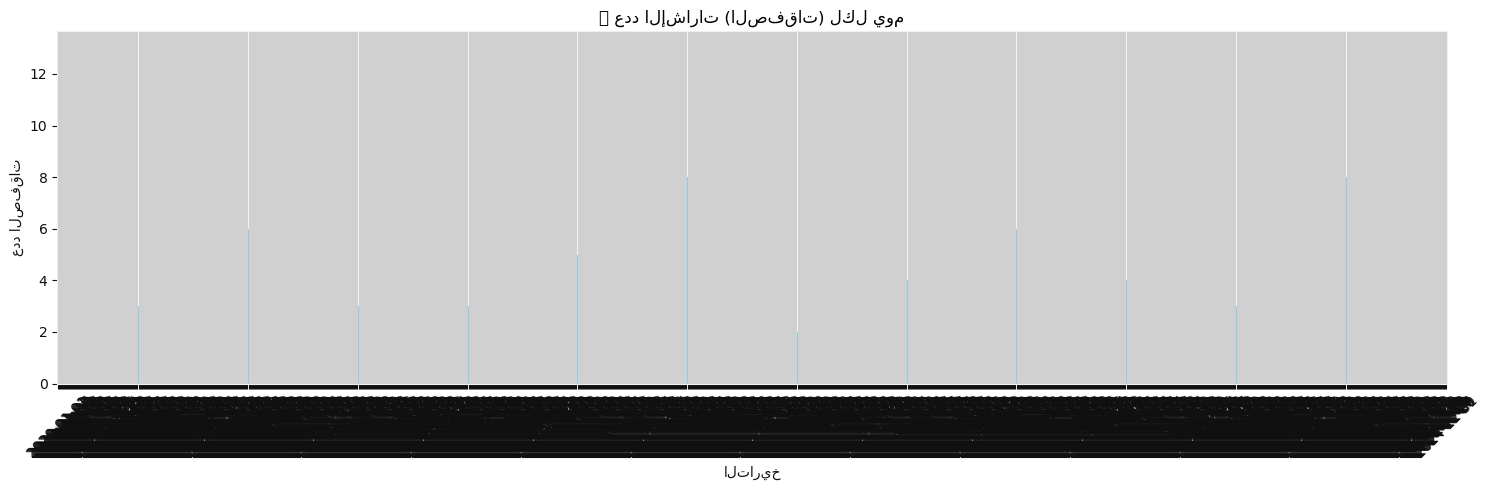

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# --- تحويل الأعمدة الزمنية ---
ha_df['Gmt time'] = pd.to_datetime(ha_df['Gmt time'])
ha_df['Date'] = ha_df['Gmt time'].dt.date
ha_df['Weekday'] = ha_df['Gmt time'].dt.weekday  # الاثنين = 0، الأحد = 6

# --- 1. عدد إشارات الشراء / البيع / لا شيء ---
print("🔹 عدد الإشارات لكل نوع:")
print(ha_df['Signal'].value_counts())
print()

# --- 2. عدد الأيام الكلية في البيانات ---
num_days = ha_df['Date'].nunique()
print(f"📆 عدد الأيام في البيانات: {num_days}")
print()

# --- 3. عدد الصفقات يوميًا (Signal ≠ 0) ---
daily_signals = ha_df[ha_df['Signal'] != 0].groupby('Date').size()
print("📊 إحصائيات عدد الصفقات في اليوم:")
print(daily_signals.describe())
print()

# --- 4. الأيام التي لا تحتوي صفقات (مع استبعاد السبت والأحد) ---
# كل الأيام المتاحة
all_dates = pd.Series(ha_df['Date'].unique())
all_dates = pd.to_datetime(all_dates)

# حذف السبت (5) والأحد (6)
weekdays_only = all_dates[~all_dates.dt.weekday.isin([5, 6])]

# استخراج الأيام التي بها إشارات
days_with_signals = pd.to_datetime(ha_df[ha_df['Signal'] != 0]['Date'].unique())

# تحويل إلى نوع date باستخدام list comprehension
weekdays_only_dates = set([d.date() for d in weekdays_only])
days_with_signals_dates = set([d.date() for d in days_with_signals])

# استخراج الأيام بلا إشارات ولا تُعتبر عطلة
no_trade_days = weekdays_only_dates - days_with_signals_dates

# طباعة عددها
print(f"🚫 عدد الأيام بلا إشارات (باستثناء السبت والأحد): {len(no_trade_days)}")
print()

# --- 5. أكثر يوم به إشارات ---
if not daily_signals.empty:
    most_active_day = daily_signals.idxmax()
    max_signals = daily_signals.max()
    print(f"🔥 أكثر يوم نشاطًا: {most_active_day} بعدد إشارات: {max_signals}")
    print()

# --- 6. رسم بياني لعدد الإشارات اليومية ---
plt.figure(figsize=(15, 5))
daily_signals.plot(kind='bar', color='skyblue')
plt.title('📈 عدد الإشارات (الصفقات) لكل يوم')
plt.ylabel('عدد الصفقات')
plt.xlabel('التاريخ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


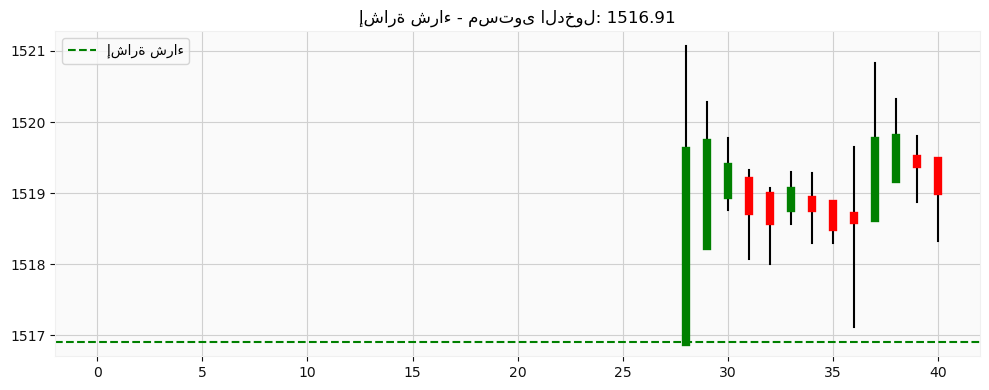

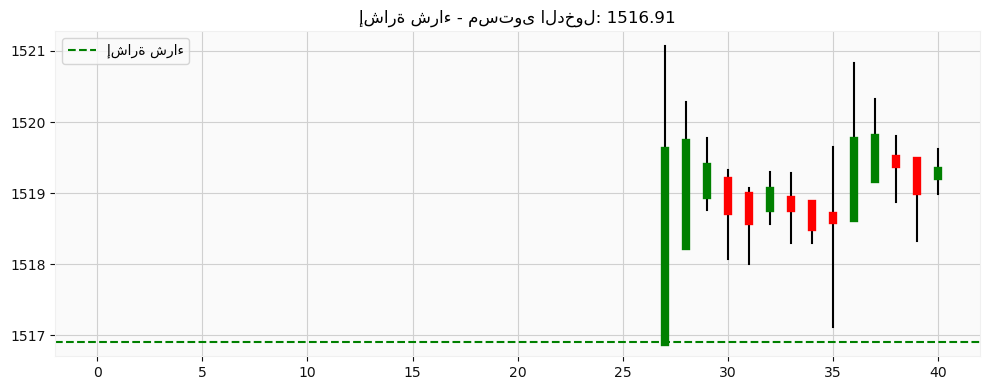

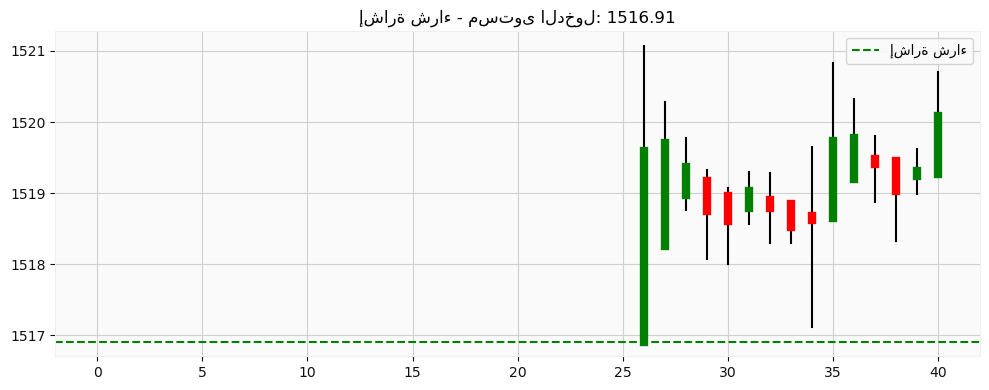

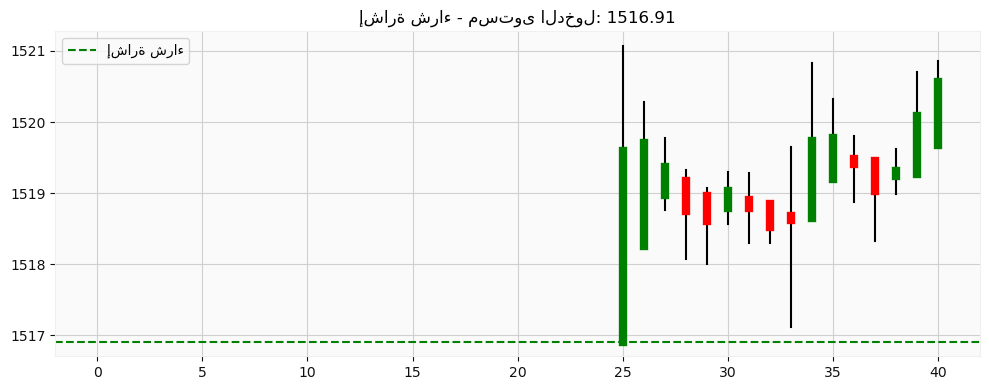

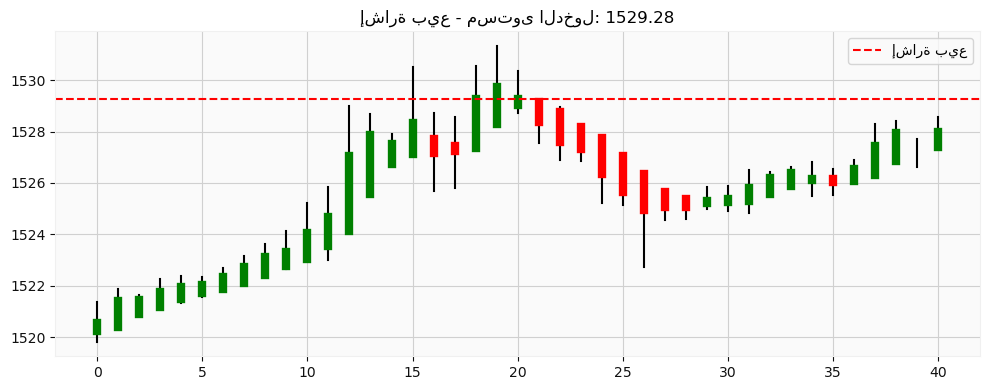

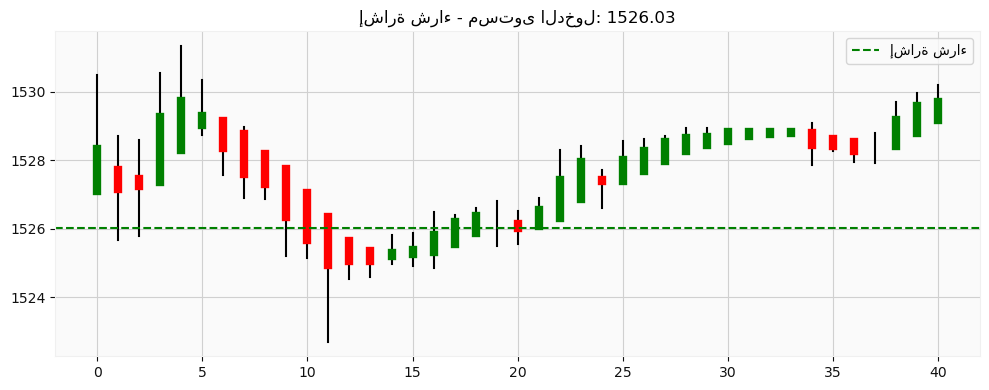

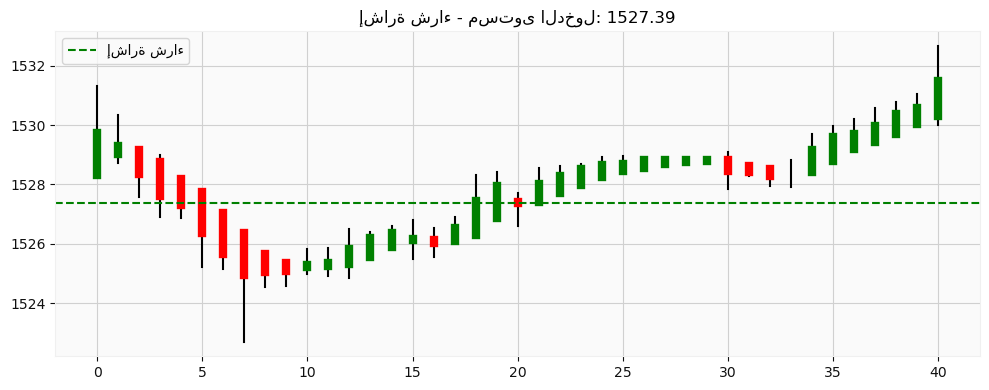

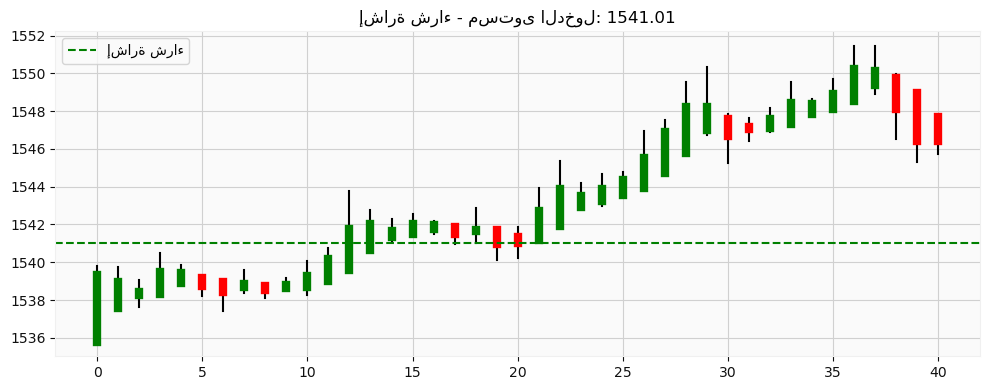

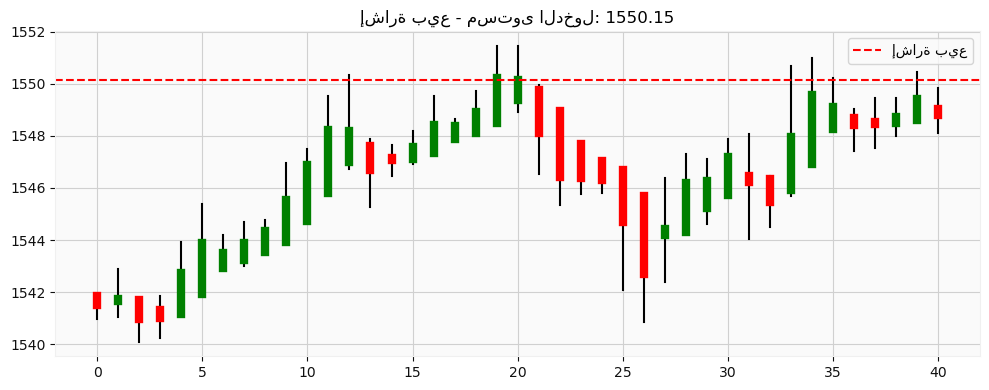

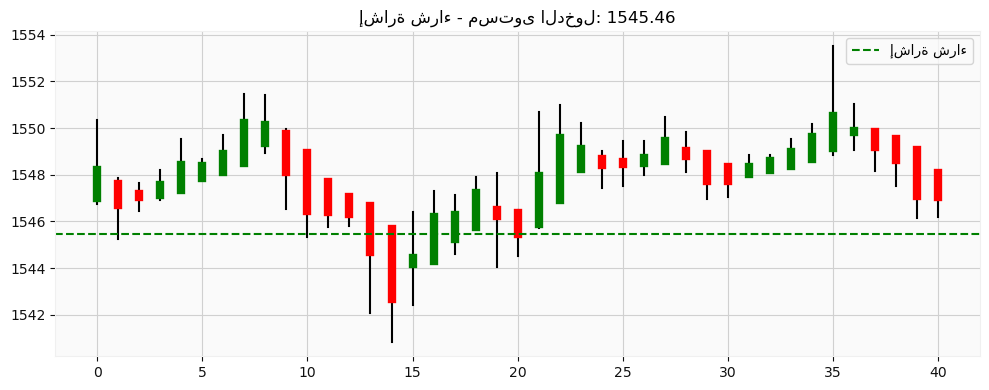

In [26]:
import matplotlib.pyplot as plt

def plot_entry_examples(df, signal_column='Signal', num_examples=10, window=20):
    """
    يرسم num_examples إشارات (شراء/بيع) مع عرض شموع Heikin Ashi حول نقطة الدخول
    """
    signals_idx = df[df[signal_column] != 0].index[:num_examples]

    for idx in signals_idx:
        start = max(idx - window, 0)
        end = min(idx + window, len(df)-1)

        sub_df = df.iloc[start:end+1].copy()
        entry_price = df.loc[idx, 'Close']
        signal_type = df.loc[idx, signal_column]

        color = 'green' if signal_type == 1 else 'red'
        signal_label = 'شراء' if signal_type == 1 else 'بيع'

        plt.figure(figsize=(10, 4))
        for i in range(len(sub_df)):
            o = sub_df.iloc[i]['Open']
            c = sub_df.iloc[i]['Close']
            h = sub_df.iloc[i]['High']
            l = sub_df.iloc[i]['Low']
            x = i

            body_color = 'green' if c >= o else 'red'
            plt.plot([x, x], [l, h], color='black')  # الظل
            plt.plot([x, x], [o, c], color=body_color, linewidth=6)  # الجسم

        # مستوى الدخول
        plt.axhline(entry_price, color=color, linestyle='--', label=f'إشارة {signal_label}')
        plt.title(f'إشارة {signal_label} - مستوى الدخول: {entry_price:.2f}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


plot_entry_examples(ha_df, signal_column='Signal', num_examples=10, window=20)


In [114]:
import matplotlib.pyplot as plt

def plot_entry_exit_examples(df, signal_column='Signal', num_examples=10, window=20, hold_candles=4):
    """
    عرض إشارات الدخول والخروج مع توضيح المستويات والاتجاه
    """
    signals_idx = df[df[signal_column] != 0].index[:num_examples]

    for idx in signals_idx:
        if idx + hold_candles >= len(df):
            continue  # نتجاوز إذا ما عندنا شموع كافية بعد الإشارة

        start = max(idx - window, 0)
        end = min(idx + window, len(df)-1)
        sub_df = df.iloc[start:end+1].copy()

        entry_price = df.loc[idx, 'Close']
        exit_price = df.loc[idx + hold_candles, 'Close']
        signal_type = df.loc[idx, signal_column]

        color = 'green' if signal_type == 1 else 'red'
        signal_label = 'شراء' if signal_type == 1 else 'بيع'

        plt.figure(figsize=(10, 4))

        for i in range(len(sub_df)):
            o = sub_df.iloc[i]['Open']
            c = sub_df.iloc[i]['Close']
            h = sub_df.iloc[i]['High']
            l = sub_df.iloc[i]['Low']
            x = i

            body_color = 'green' if c >= o else 'red'
            plt.plot([x, x], [l, h], color='black')  # الظل
            plt.plot([x, x], [o, c], color=body_color, linewidth=6)  # الجسم

        # تحديد موقع الدخول والخروج على محور x
        entry_x = idx - start
        exit_x = (idx + hold_candles) - start

        # رسم مستوى الدخول والخروج
        plt.axhline(entry_price, color='blue', linestyle='--', label='🟦 مستوى الدخول')
        plt.axhline(exit_price, color='orange', linestyle='--', label='🟧 مستوى الخروج')

        # رسم خط بين نقطة الدخول والخروج
        plt.plot([entry_x, exit_x], [entry_price, exit_price], color='purple', linewidth=2, linestyle='-', label='↗ خط الربح/الخسارة')

        plt.title(f'إشارة {signal_label} - دخول: {entry_price:.2f} → خروج: {exit_price:.2f}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


C:\Users\Access\AppData\Local\Temp\ipykernel_13308\3260578006.py:51: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from current font.
  plt.tight_layout()
C:\Users\Access\AppData\Local\Temp\ipykernel_13308\3260578006.py:51: UserWarning: Glyph 128999 (\N{LARGE ORANGE SQUARE}) missing from current font.
  plt.tight_layout()


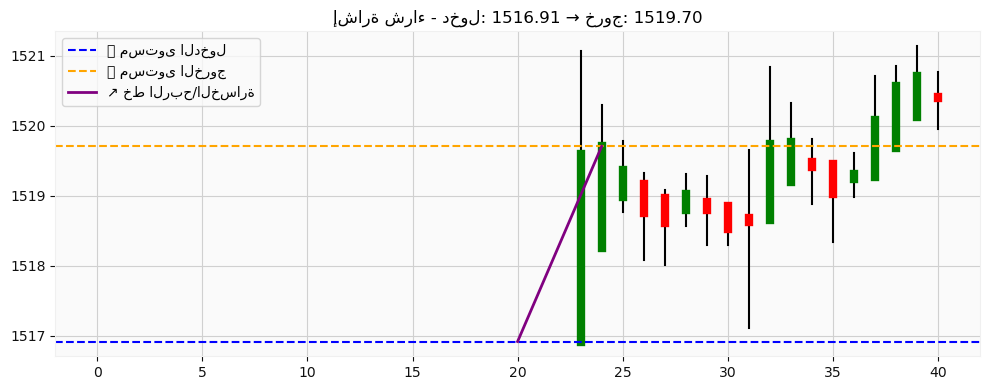

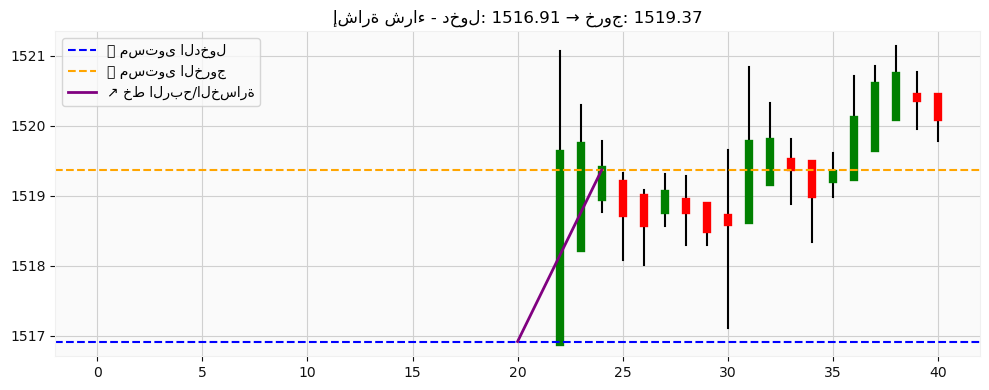

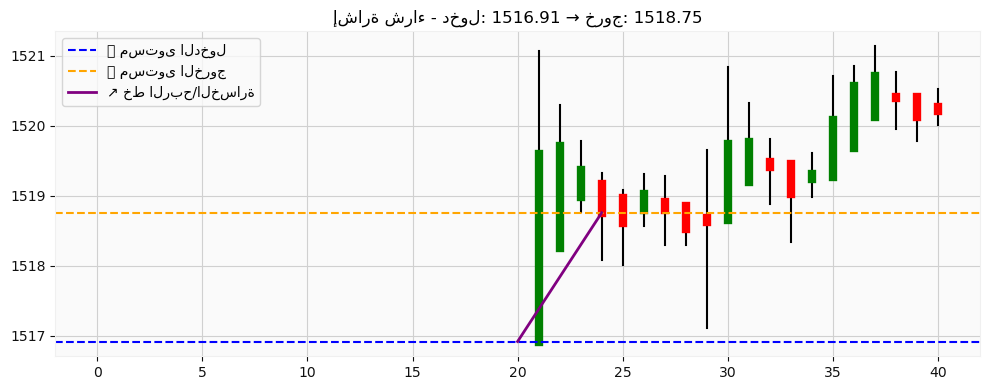

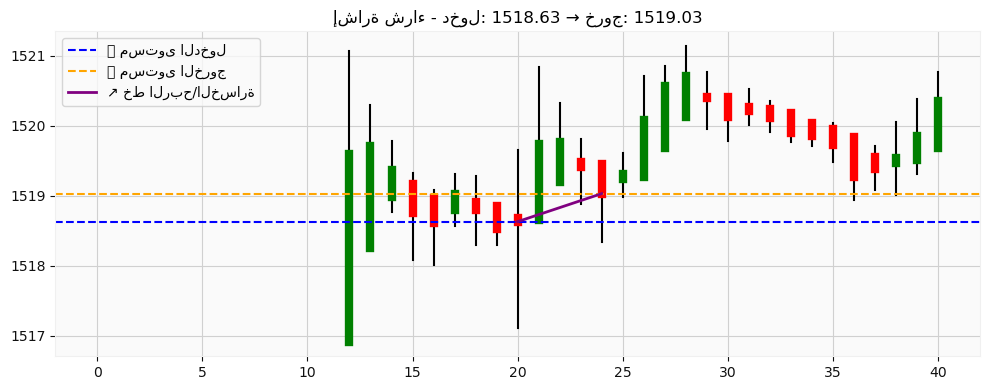

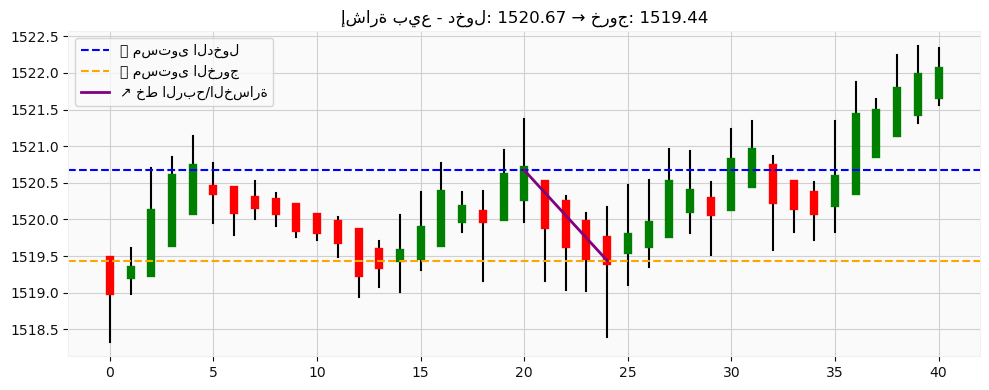

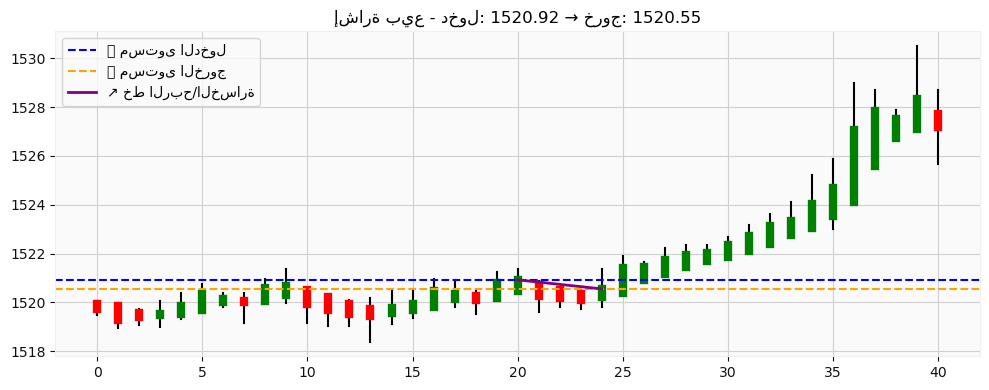

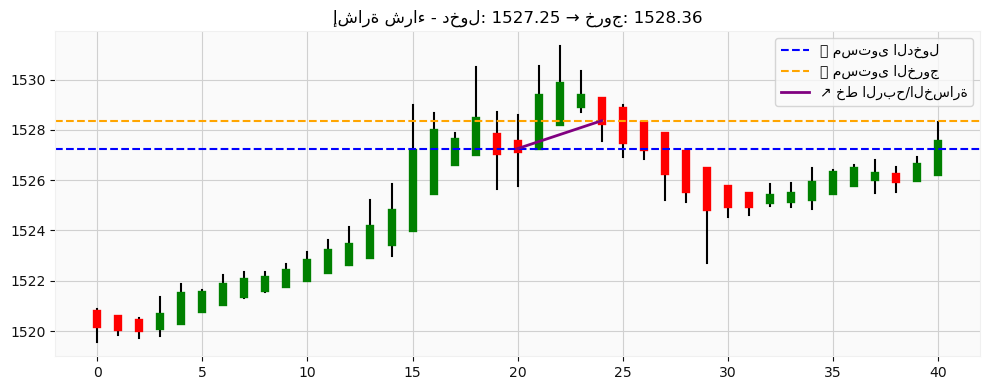

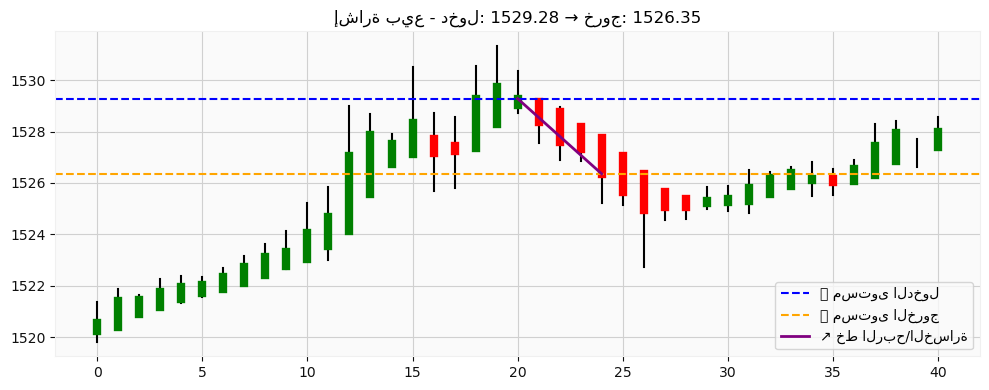

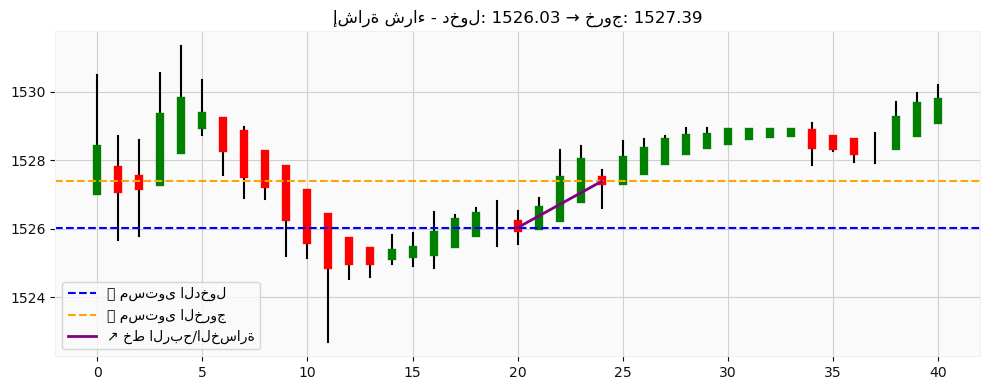

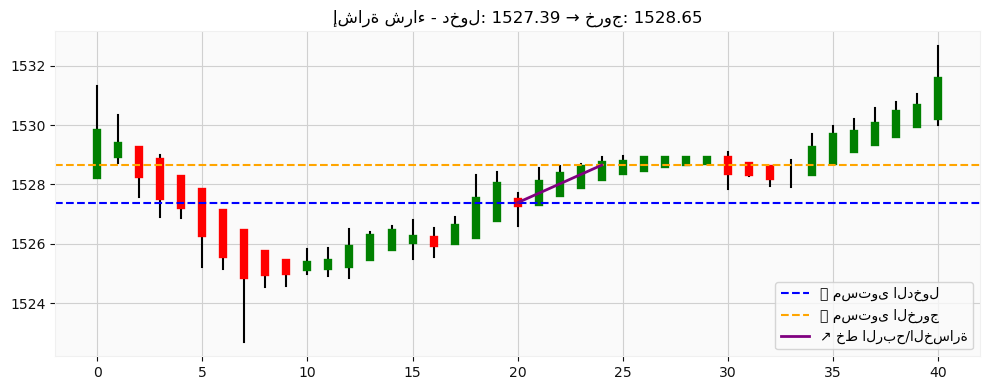

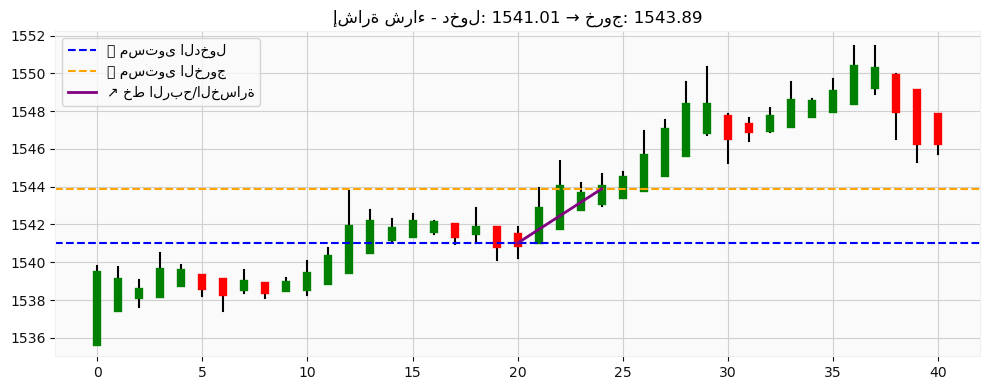

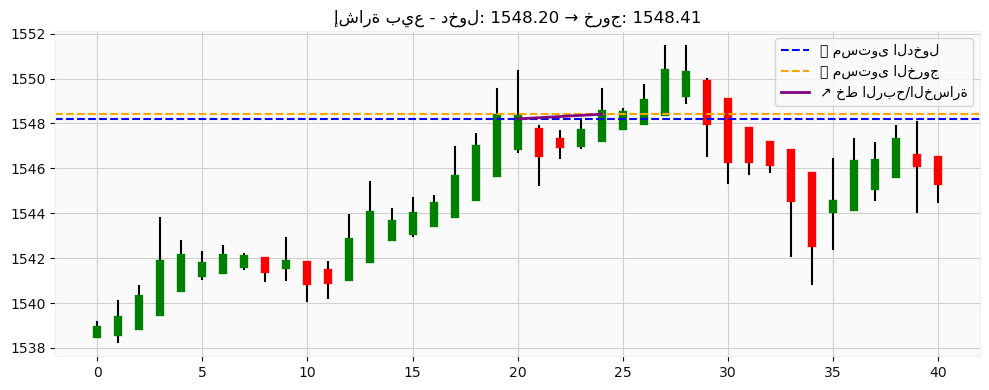

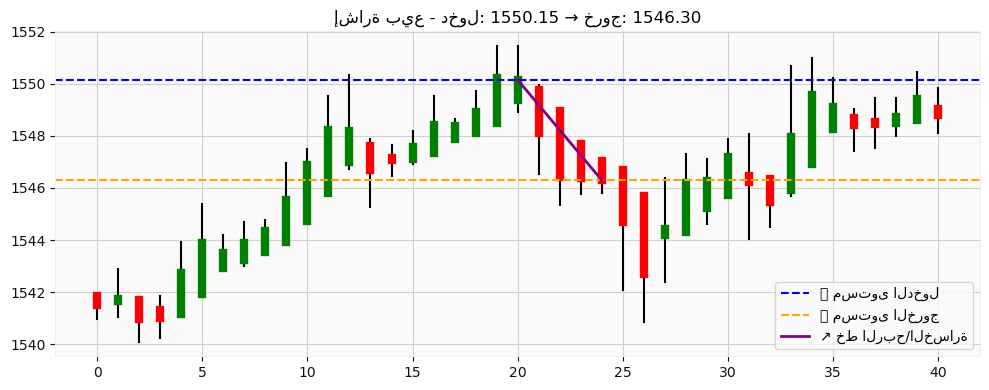

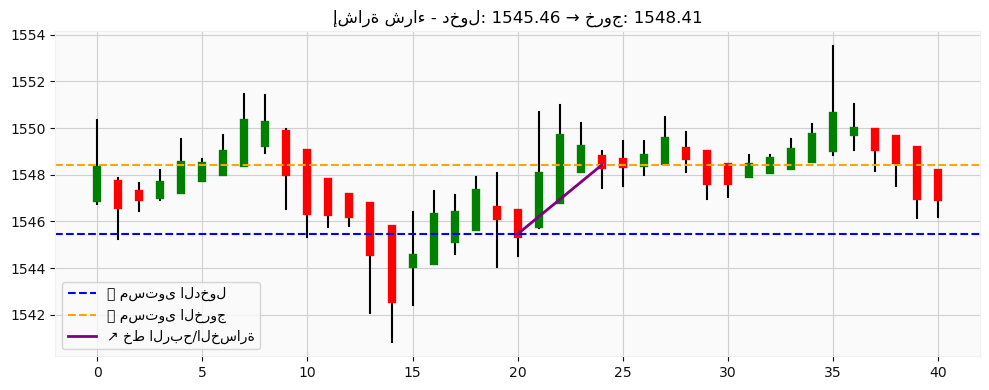

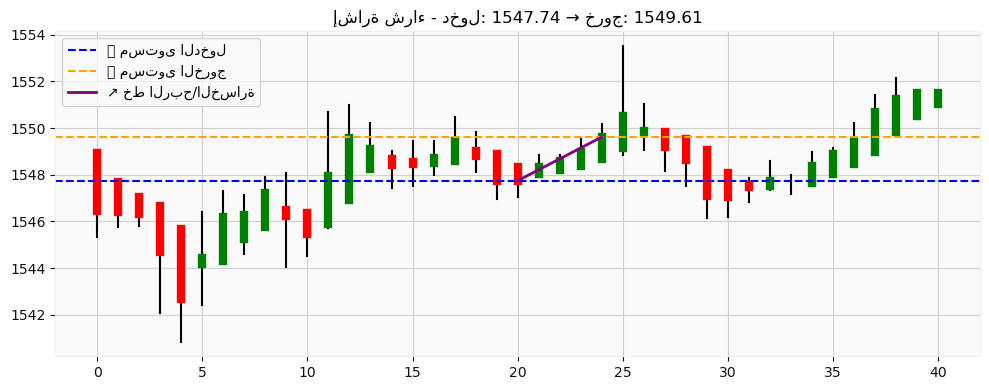

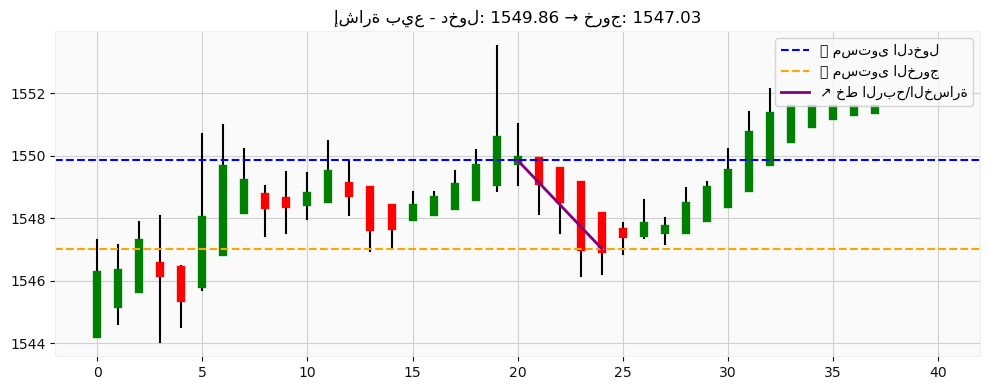

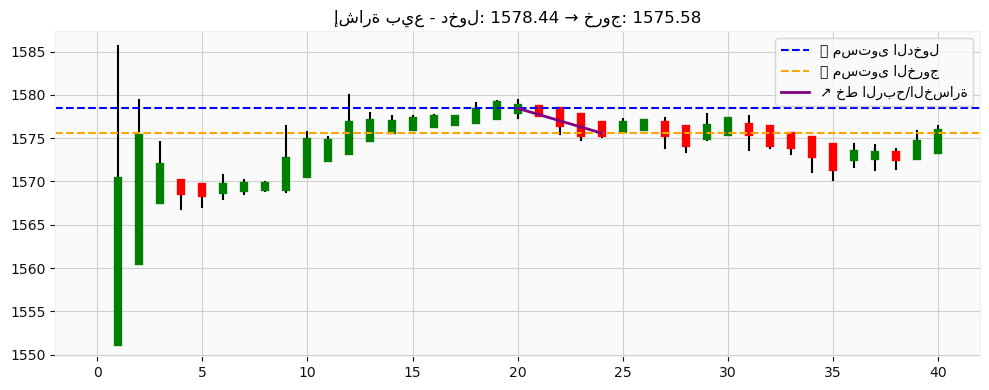

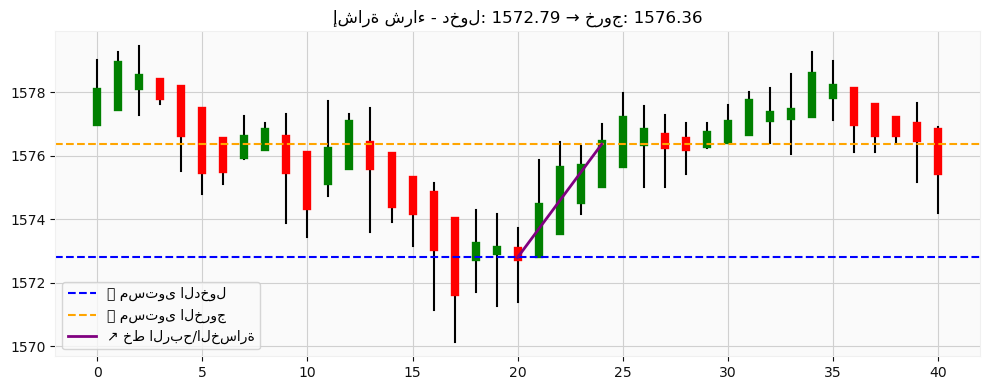

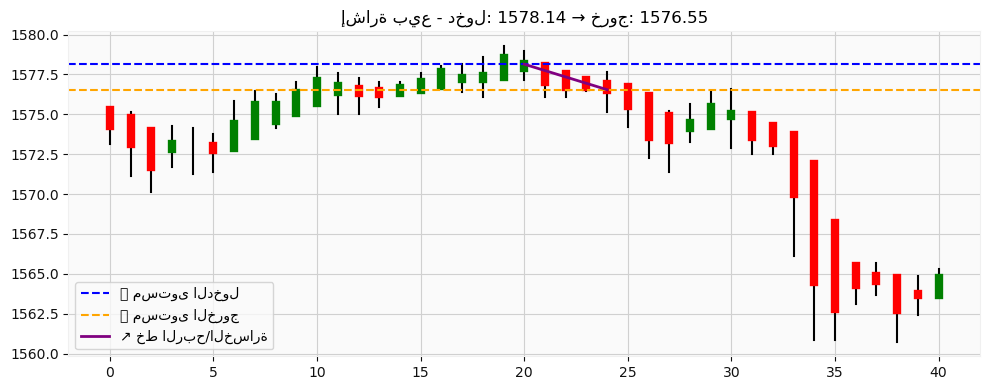

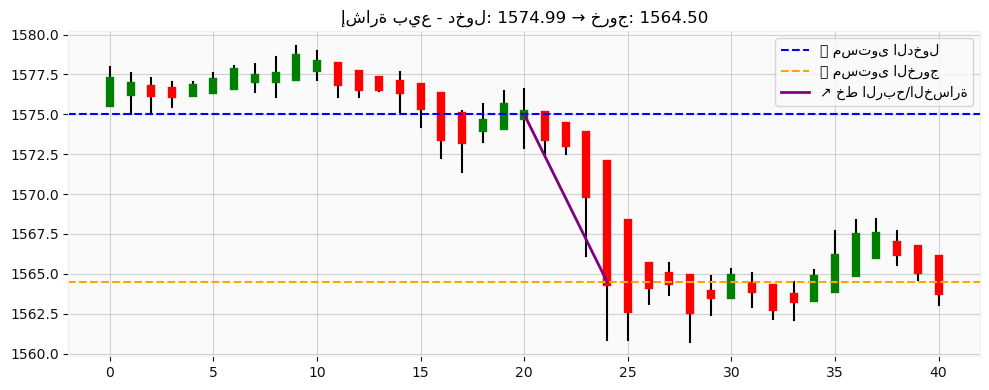

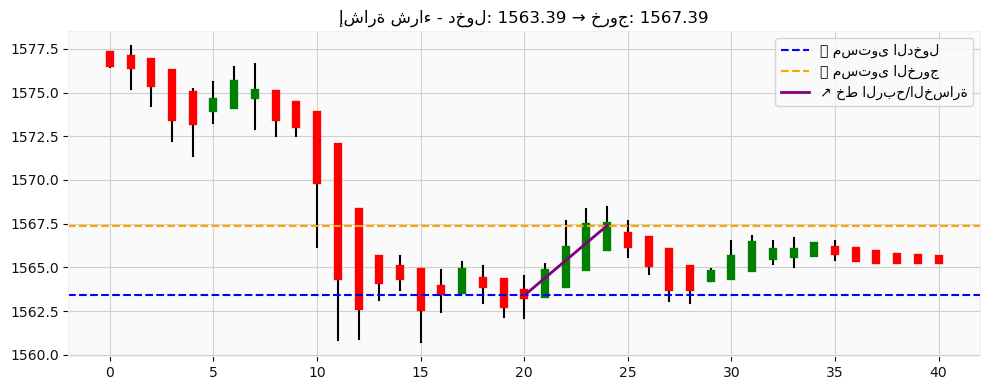

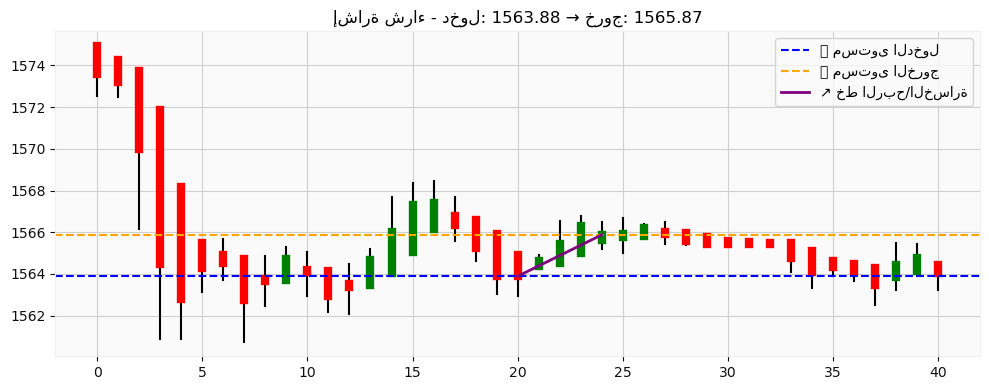

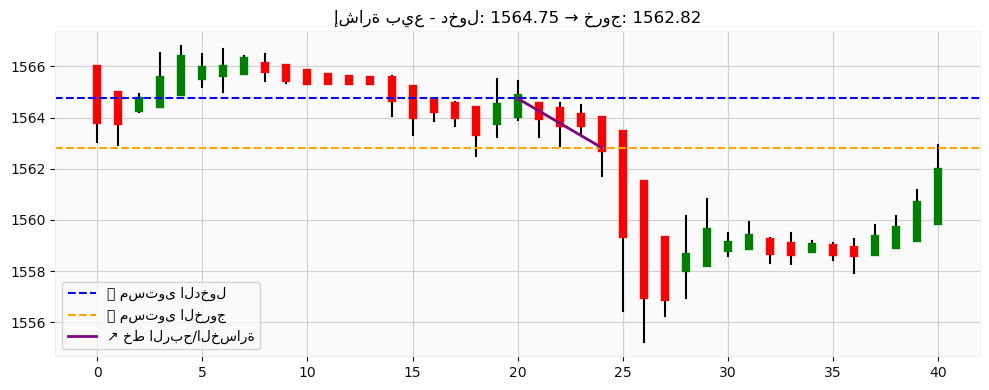

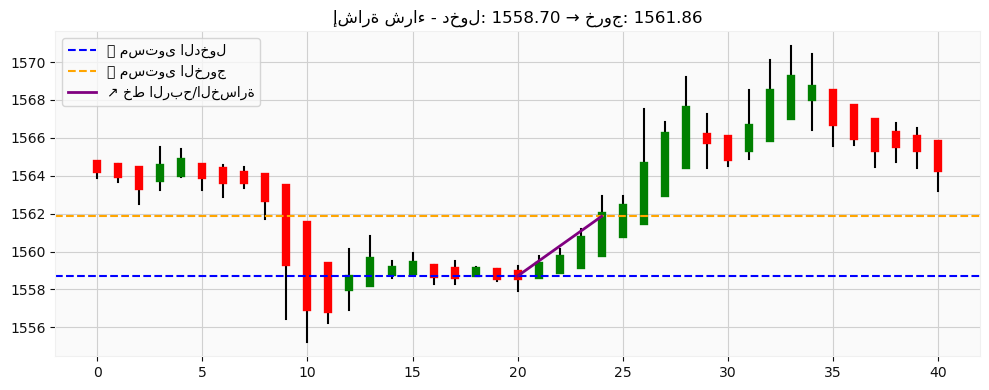

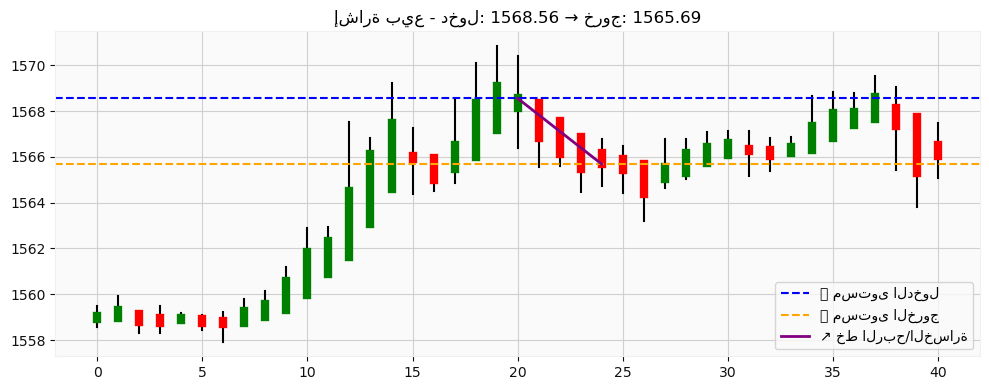

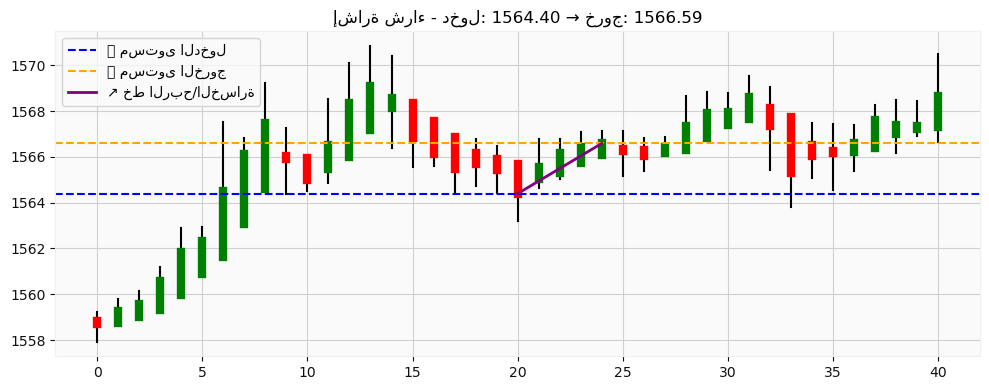

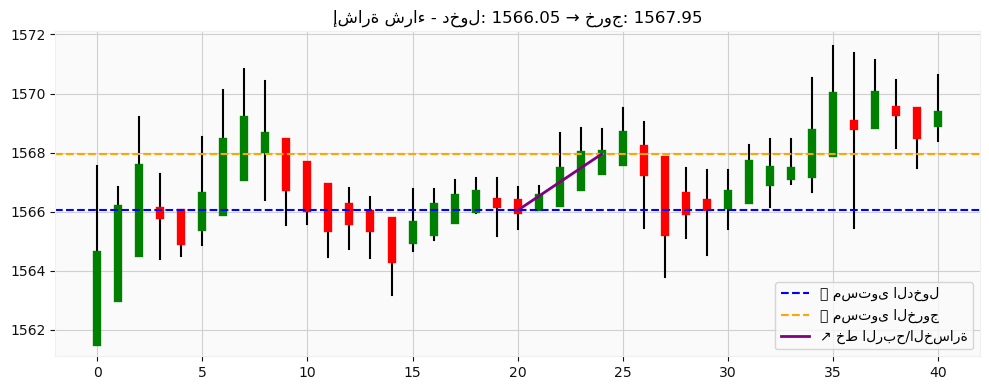

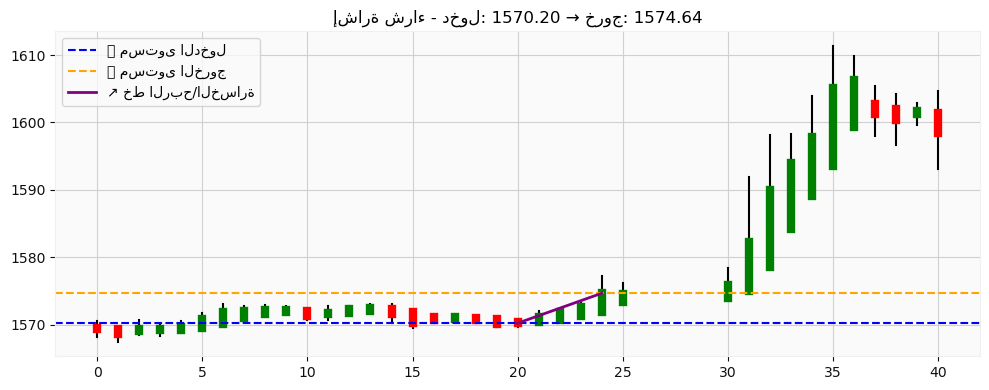

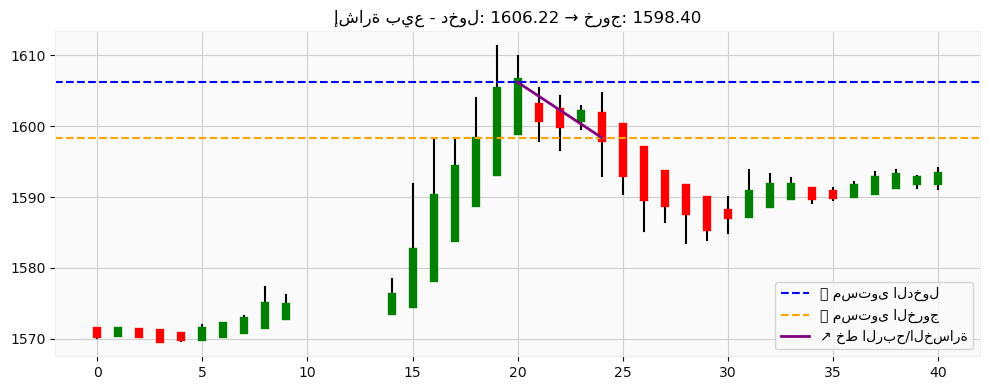

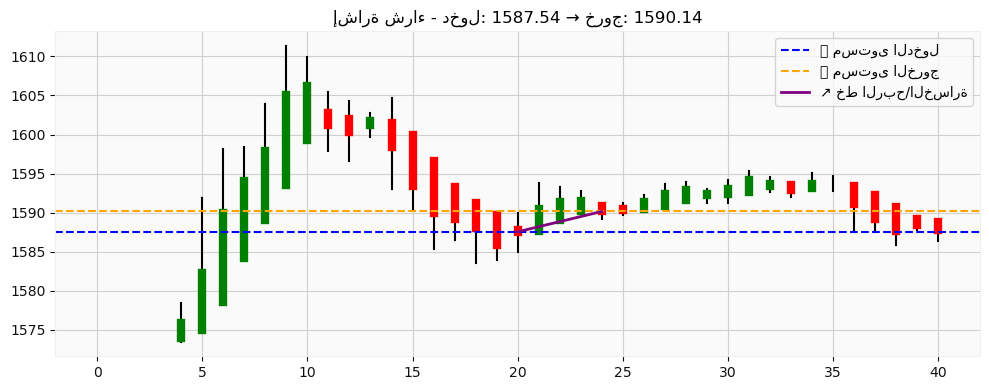

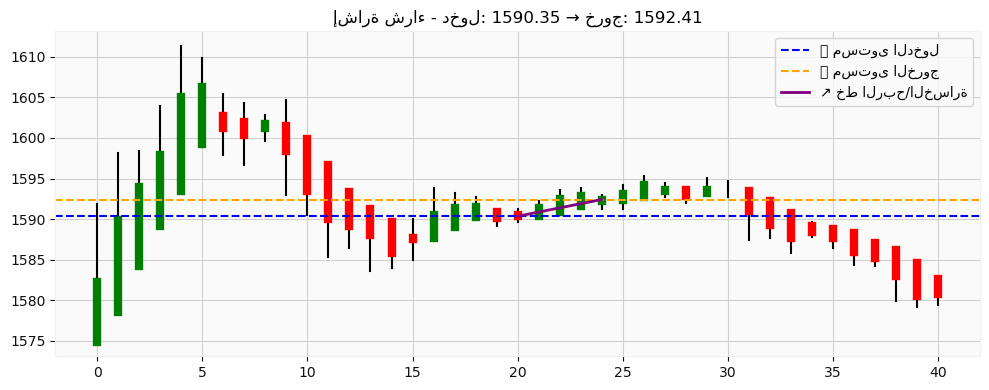

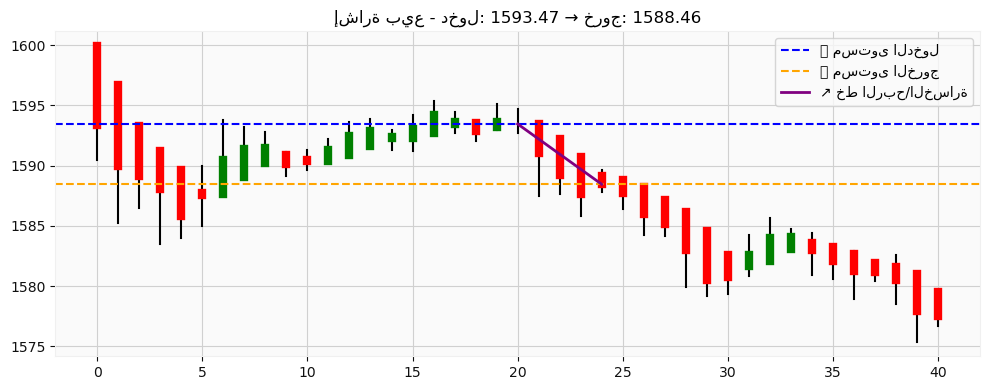

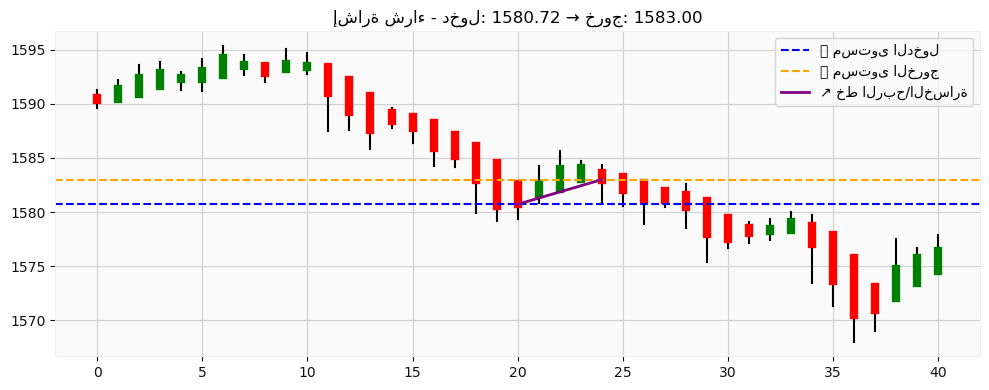

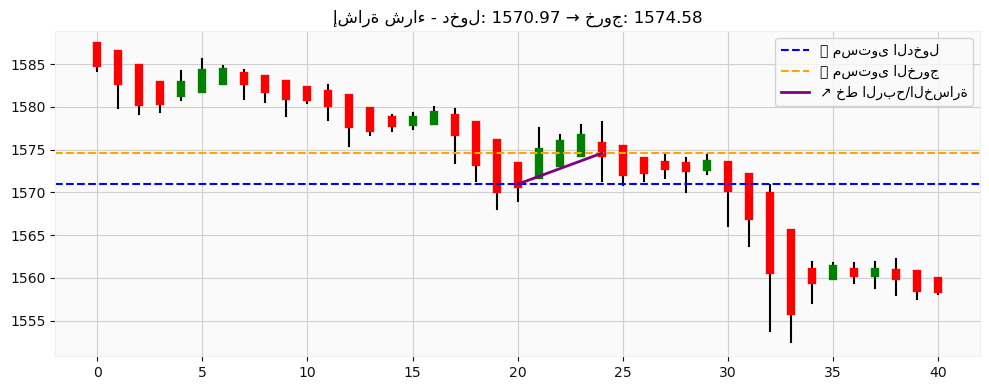

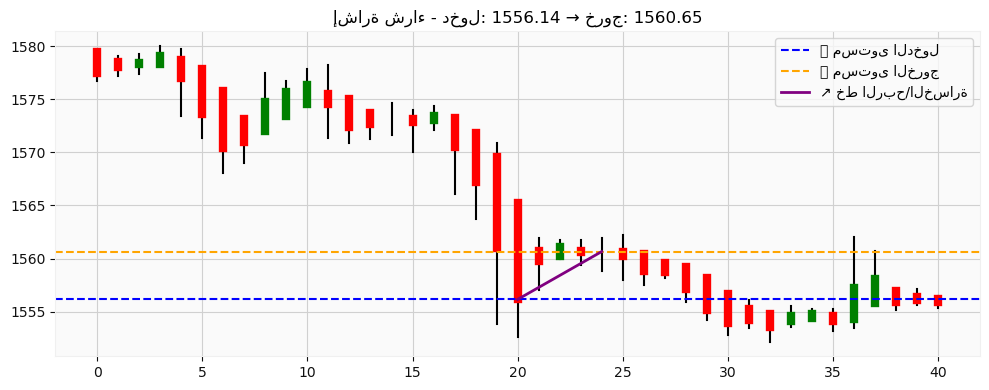

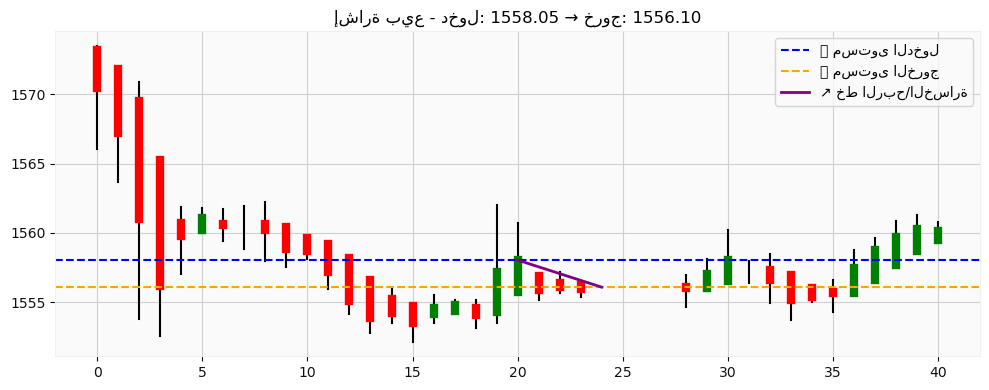

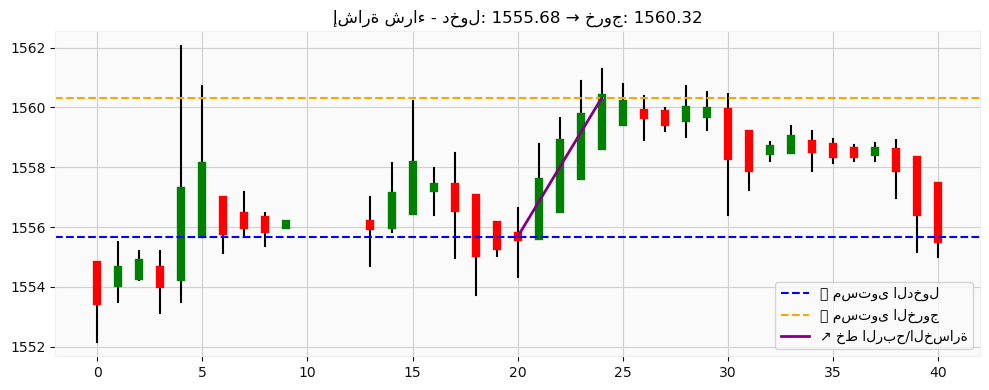

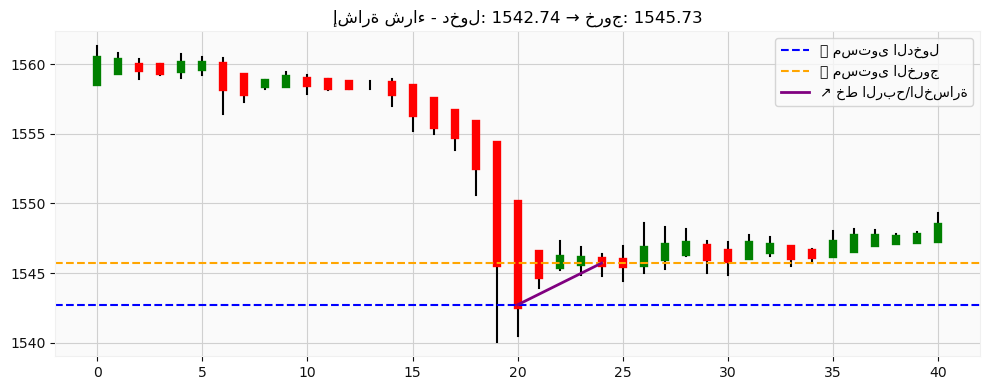

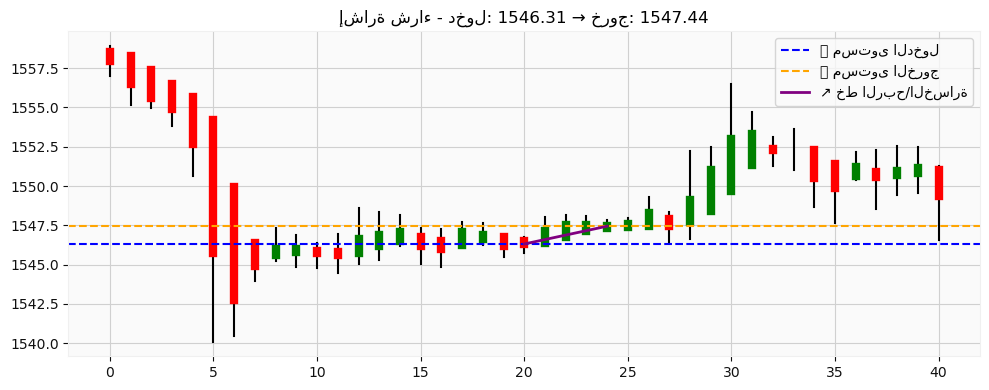

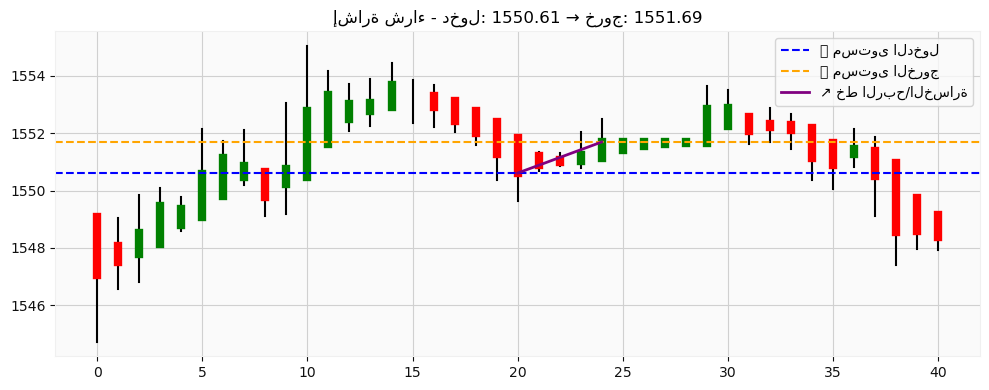

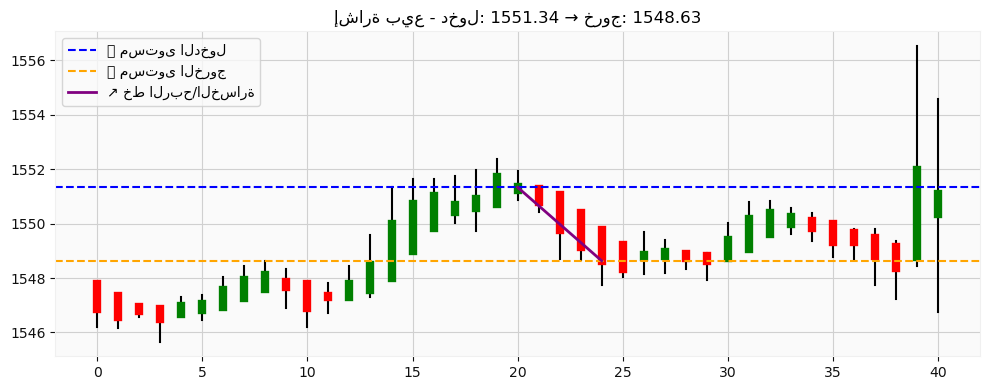

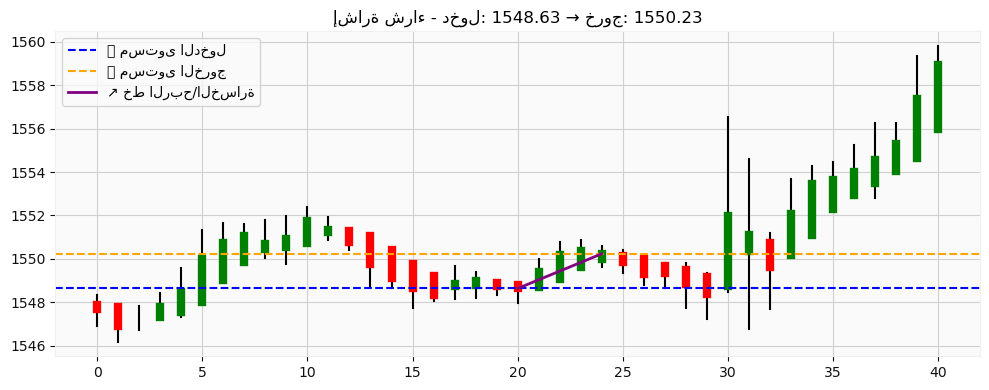

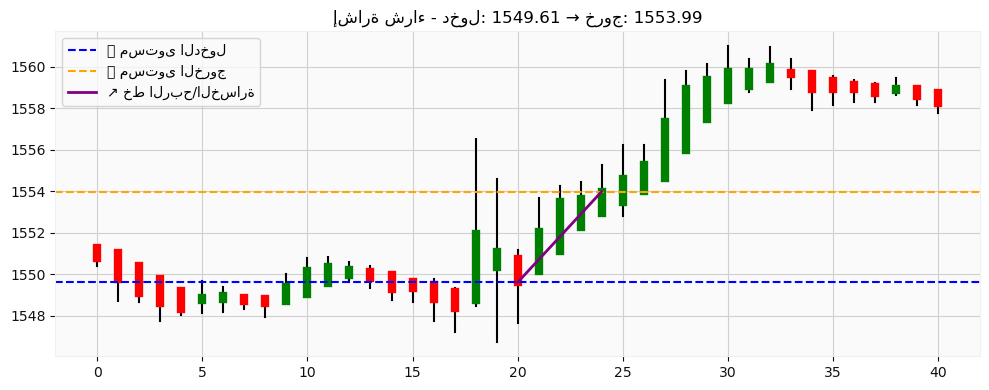

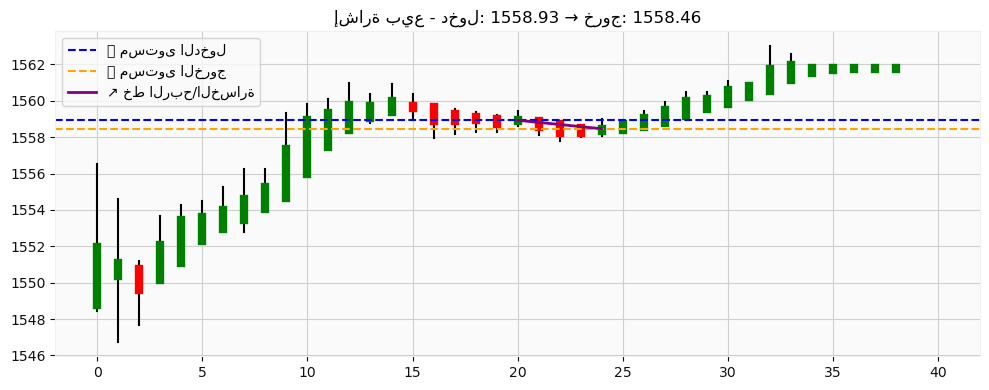

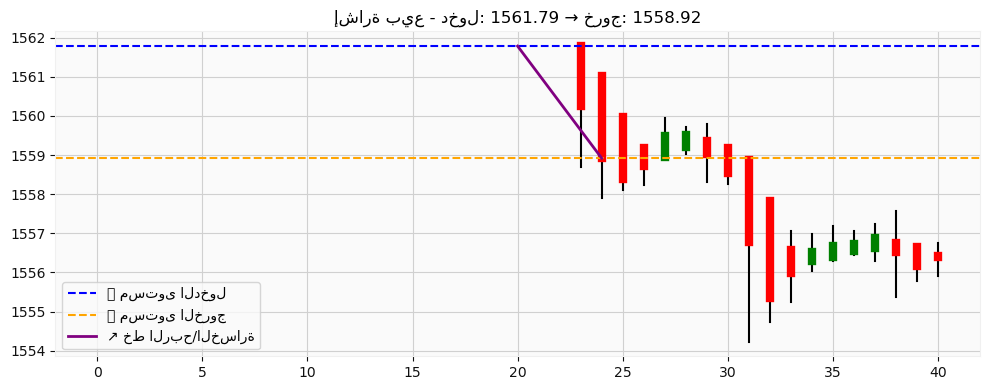

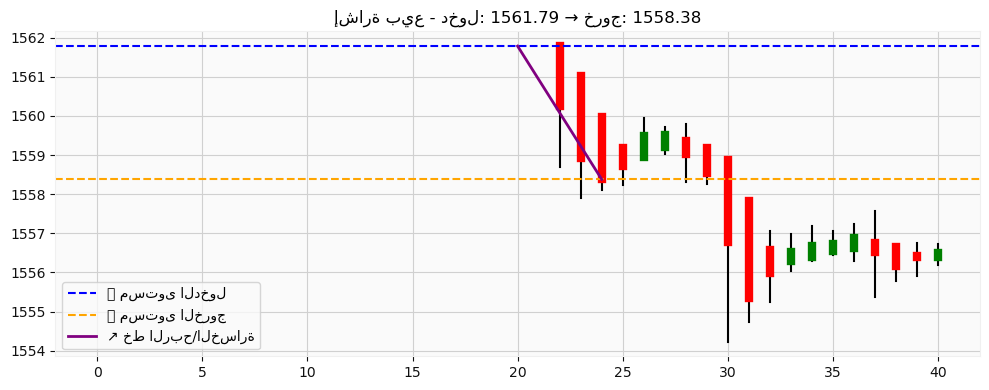

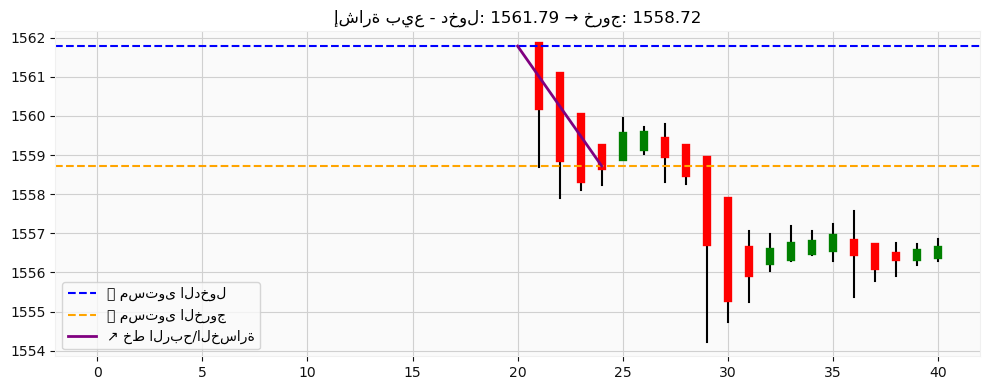

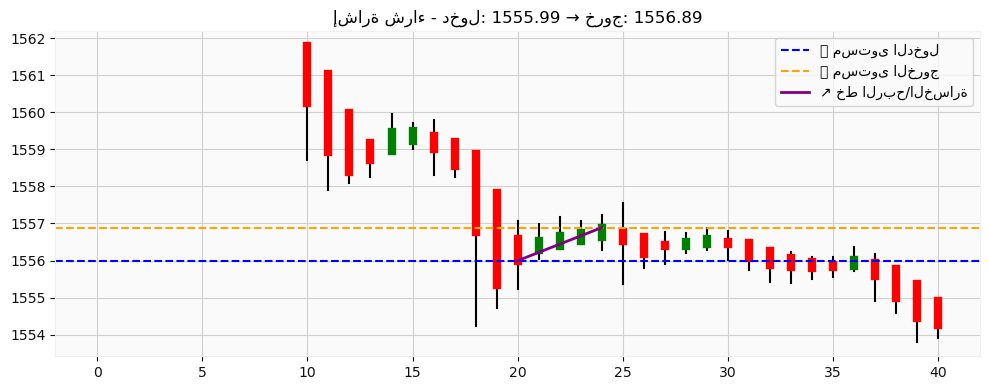

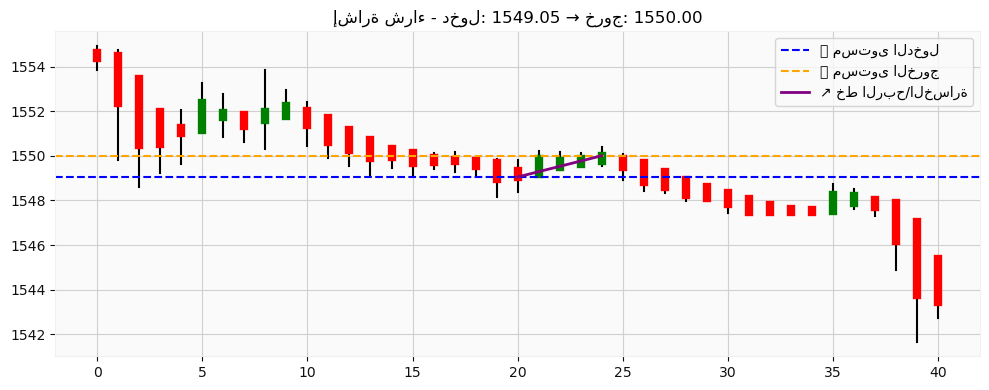

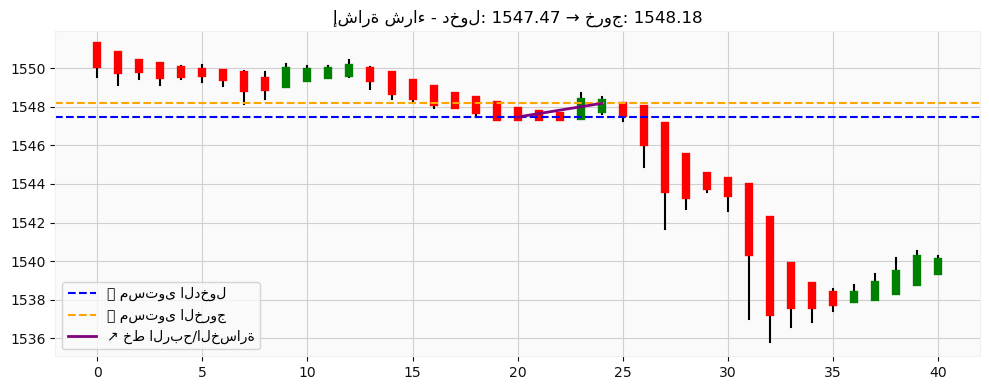

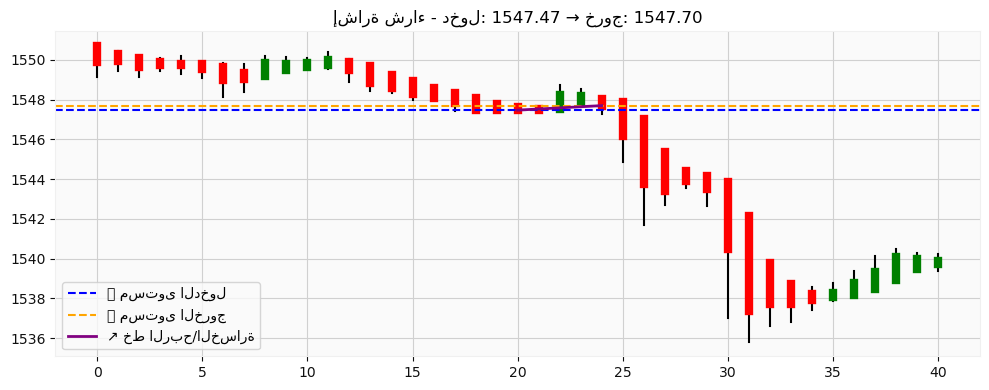

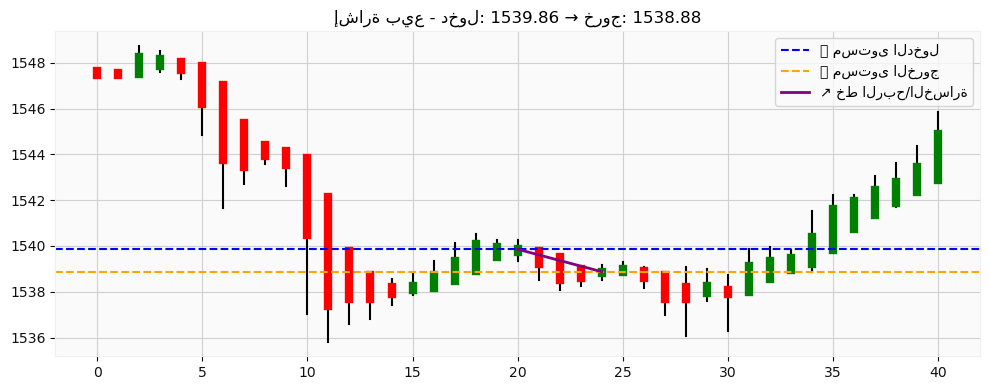

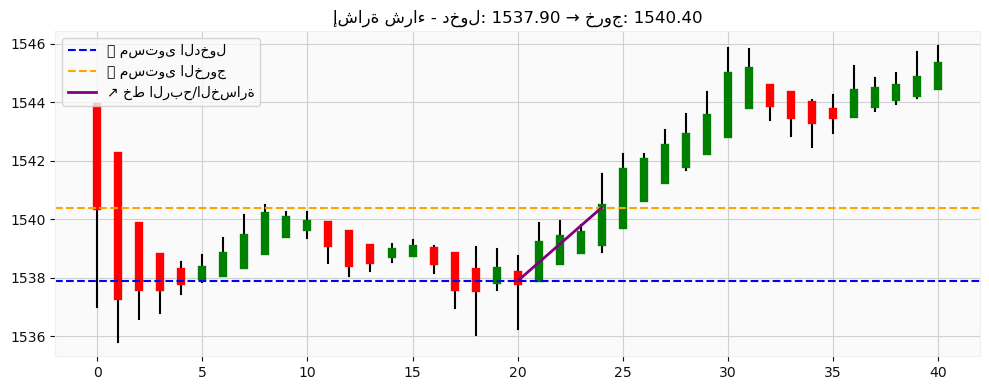

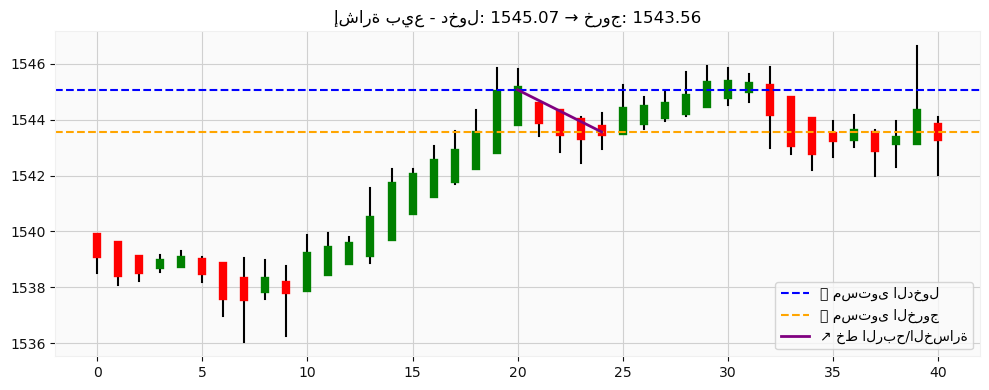

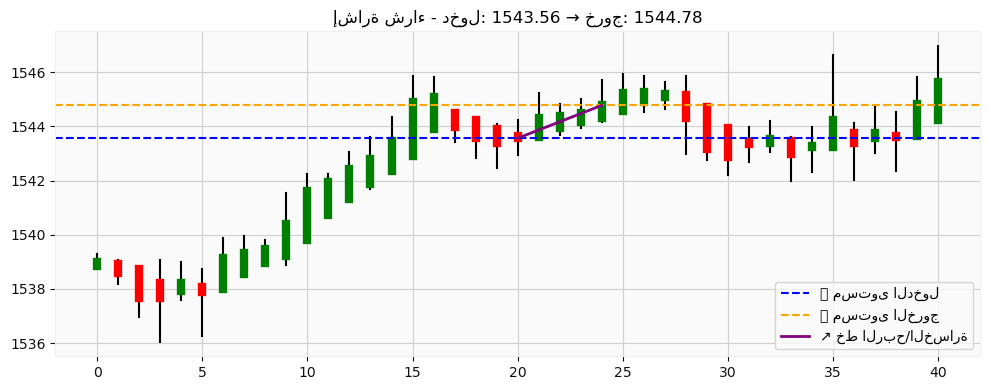

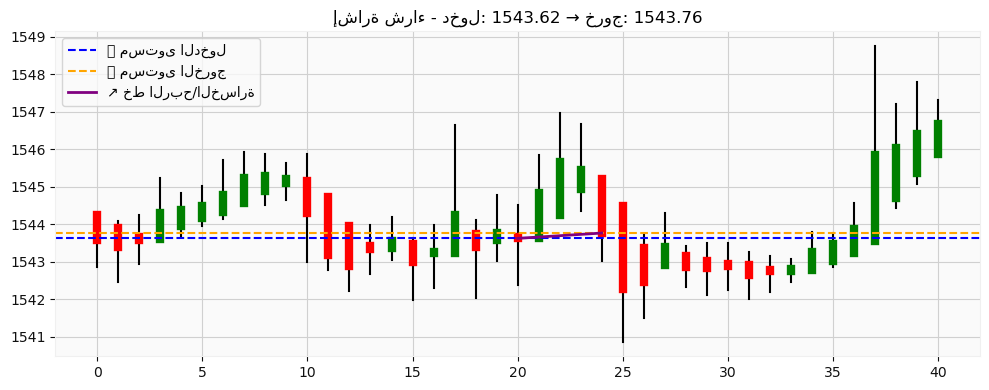

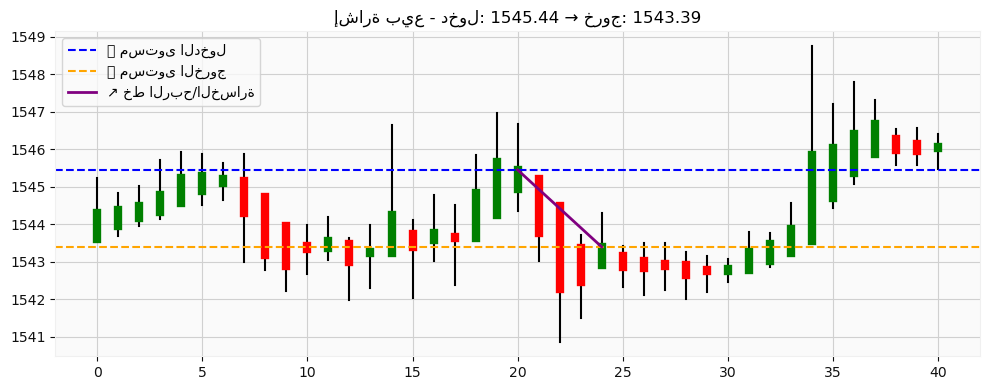

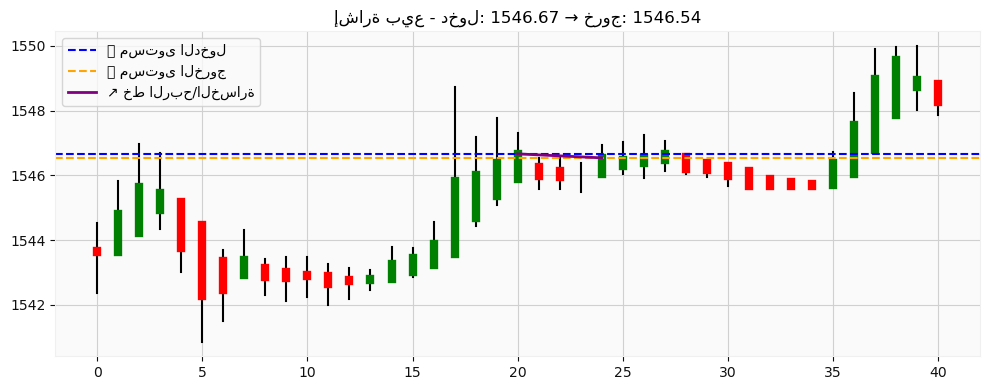

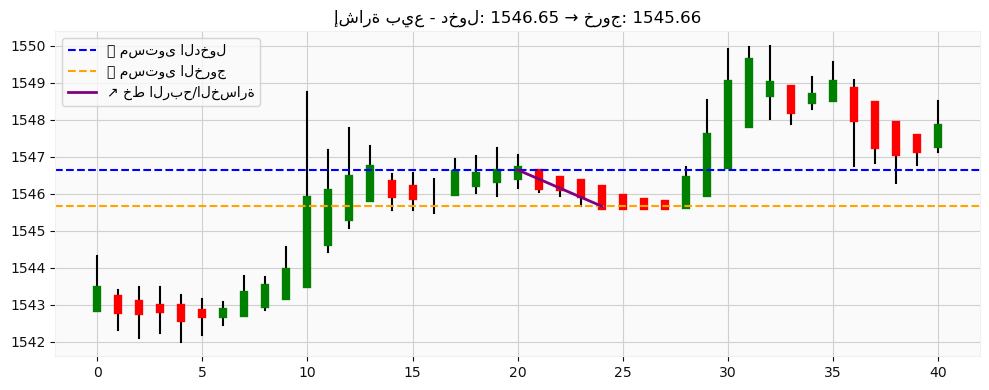

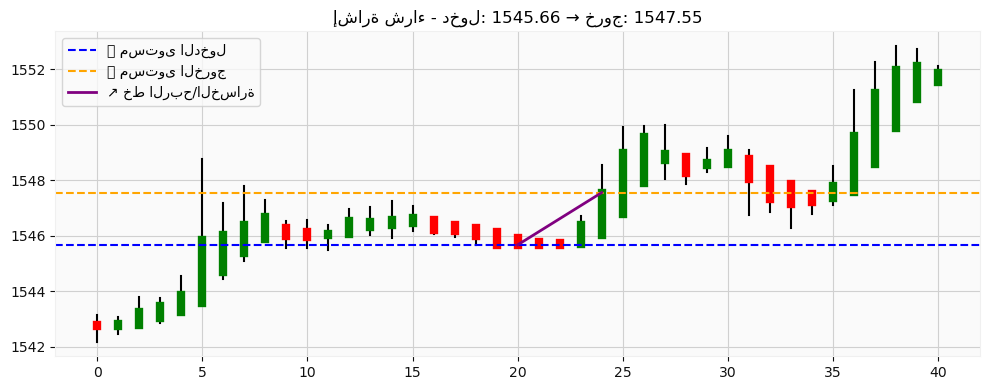

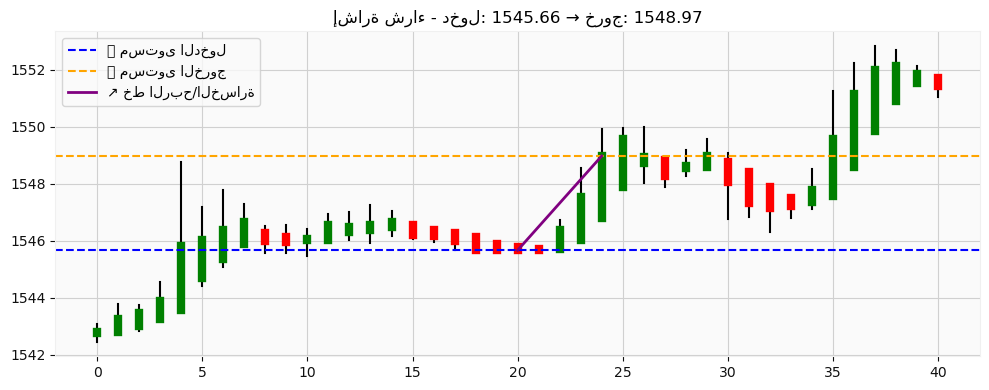

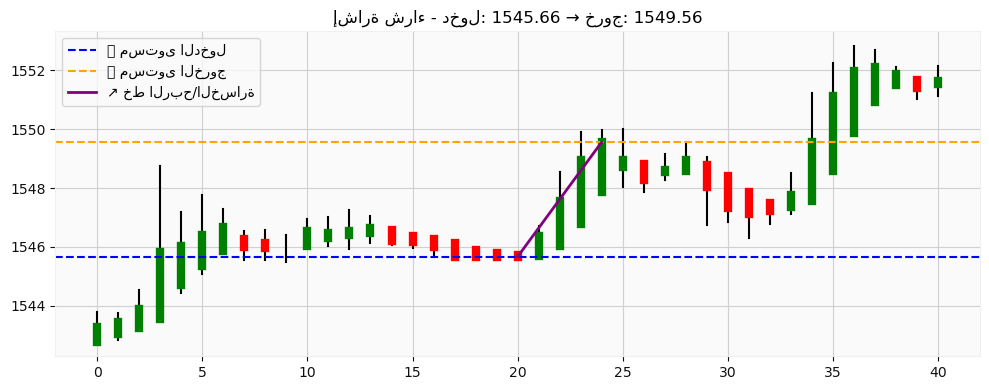

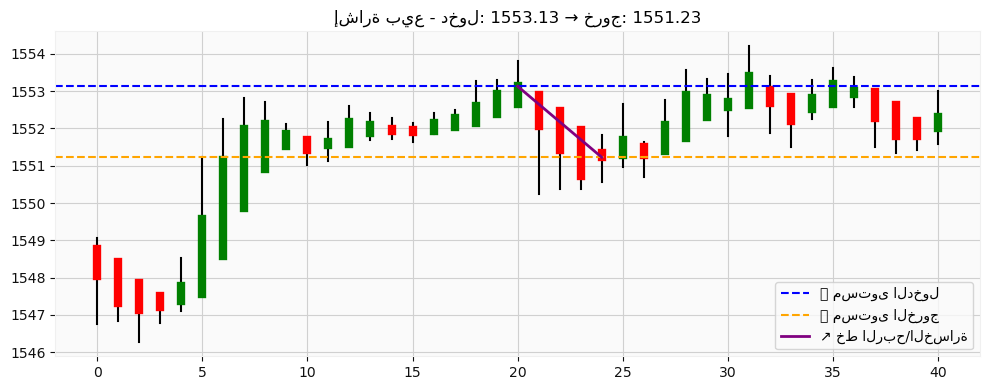

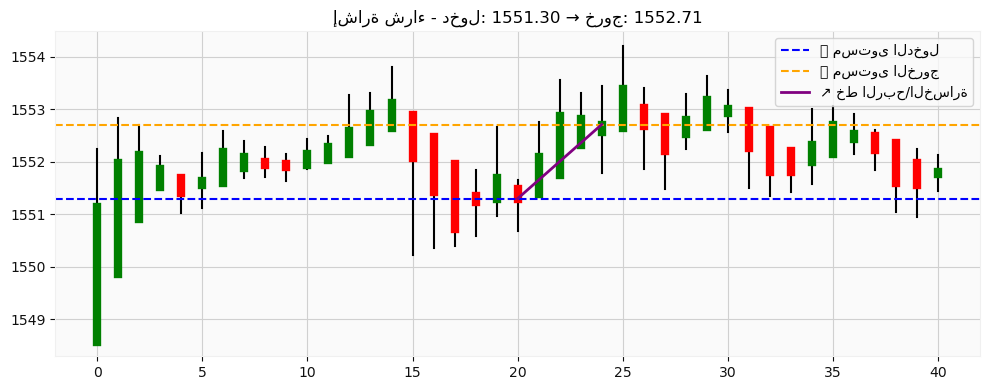

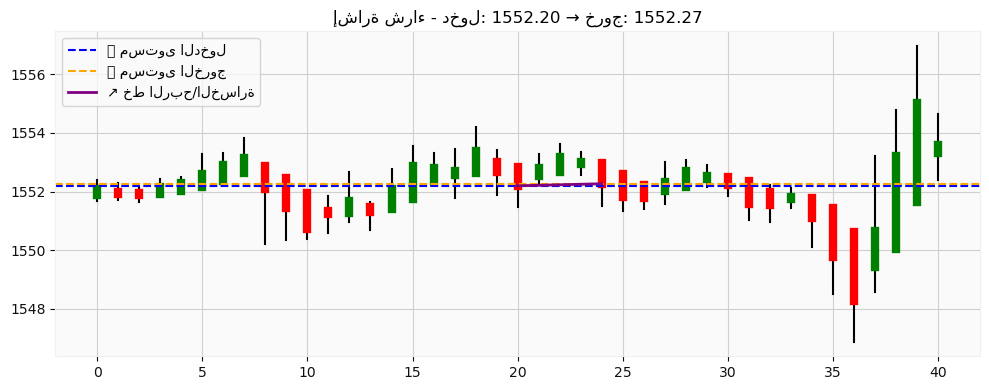

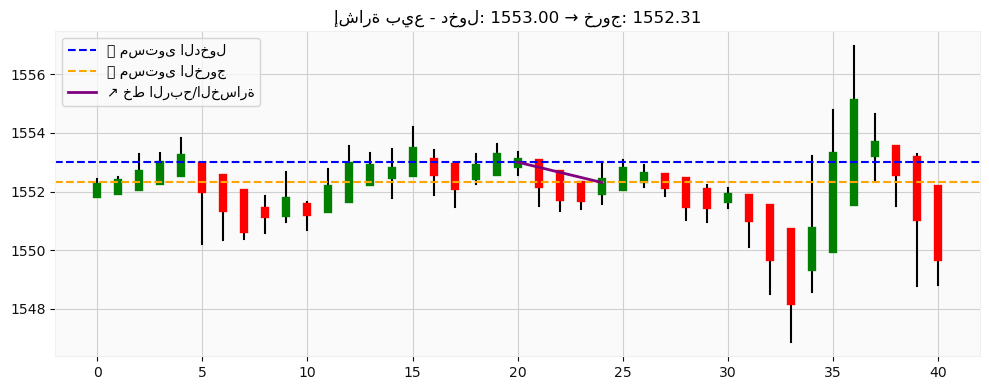

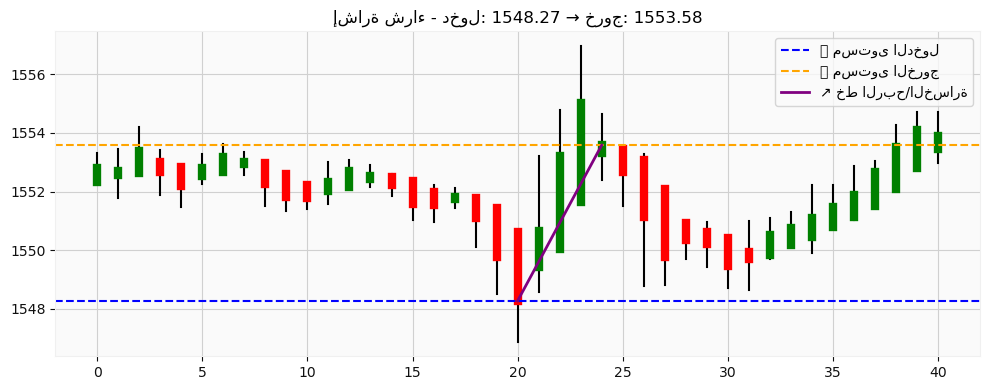

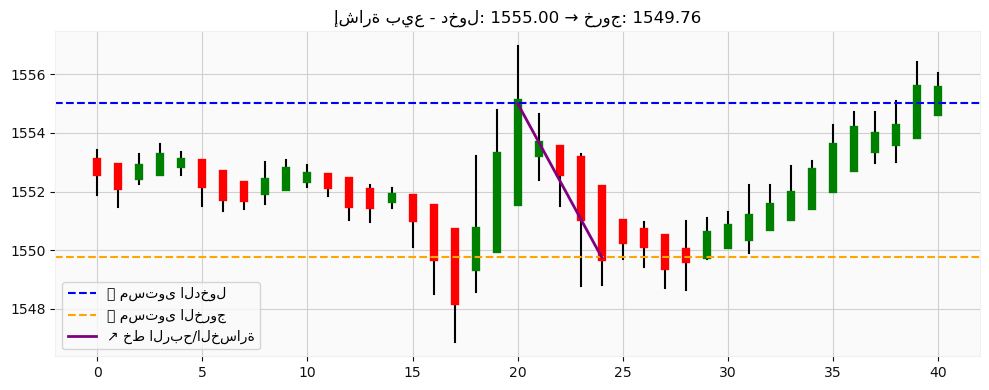

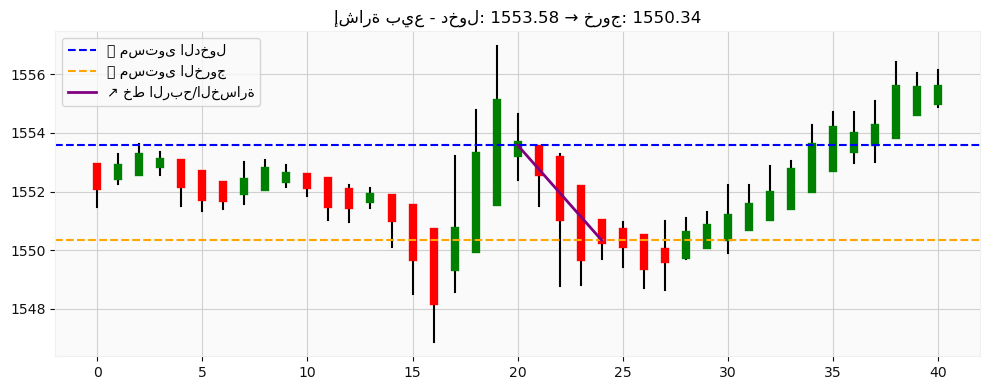

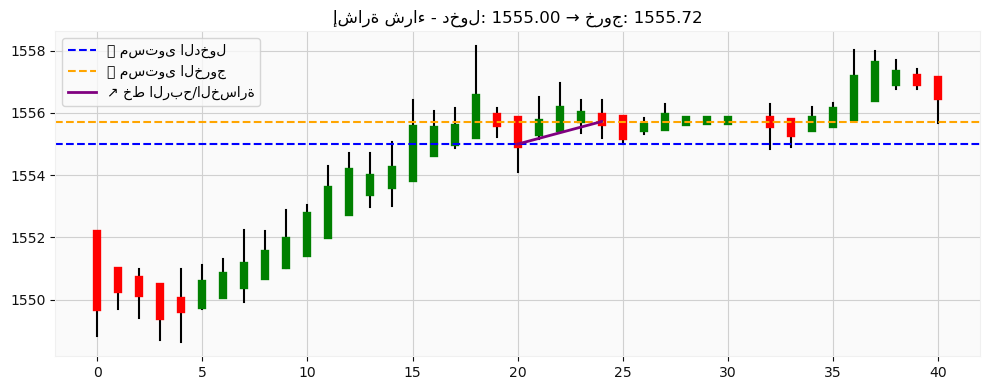

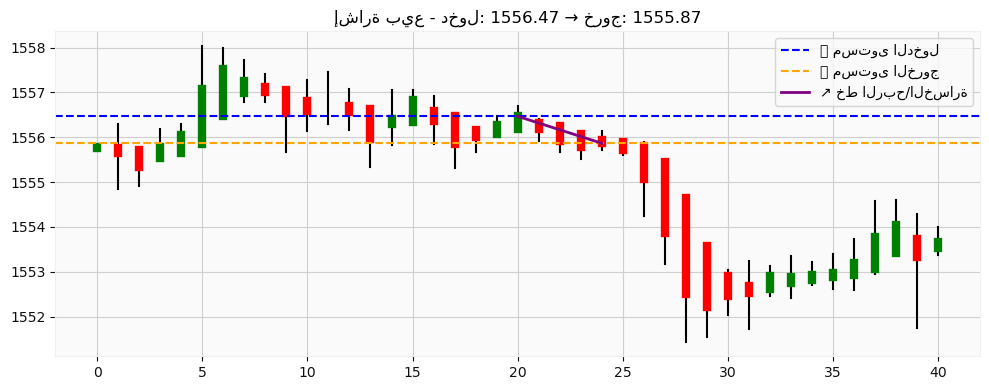

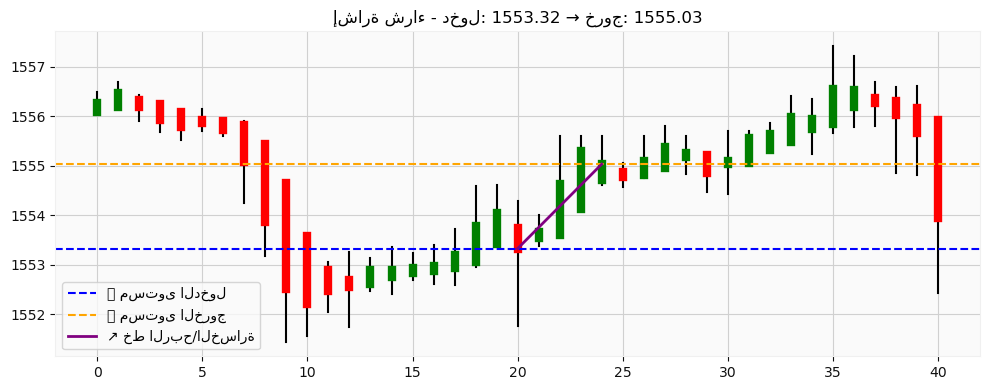

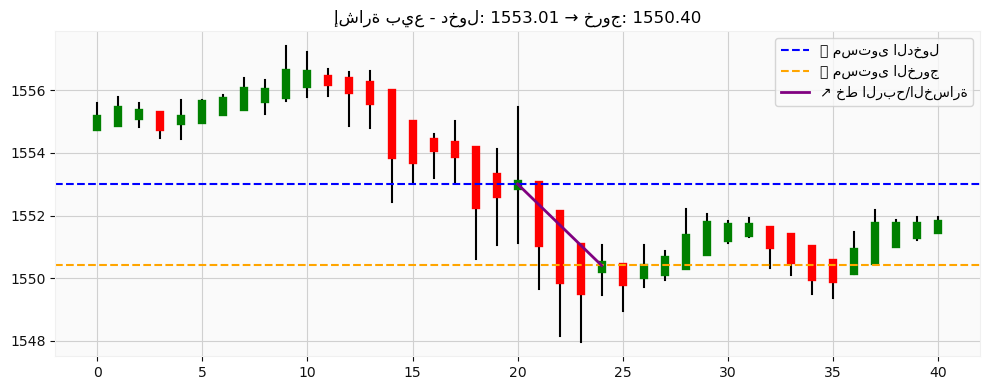

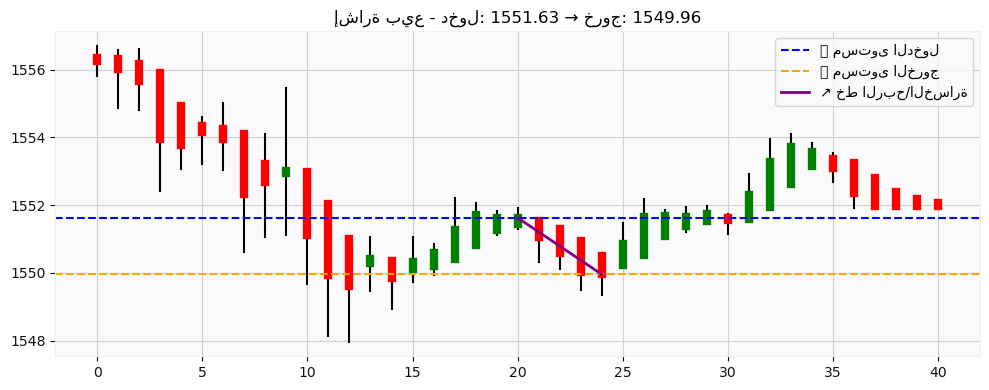

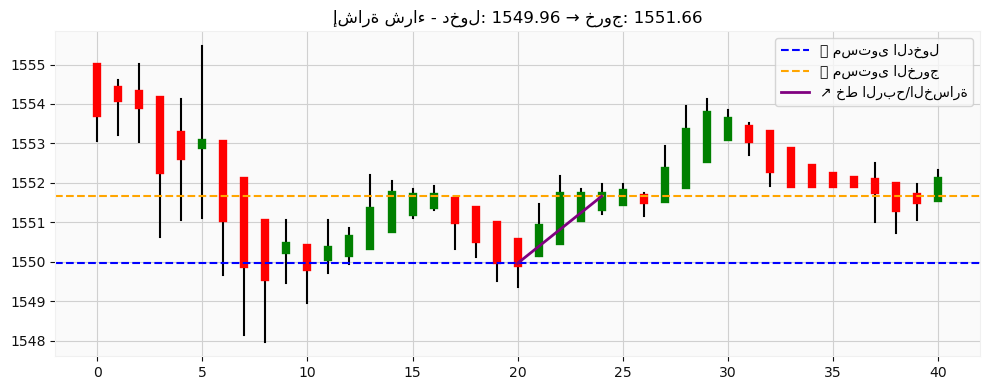

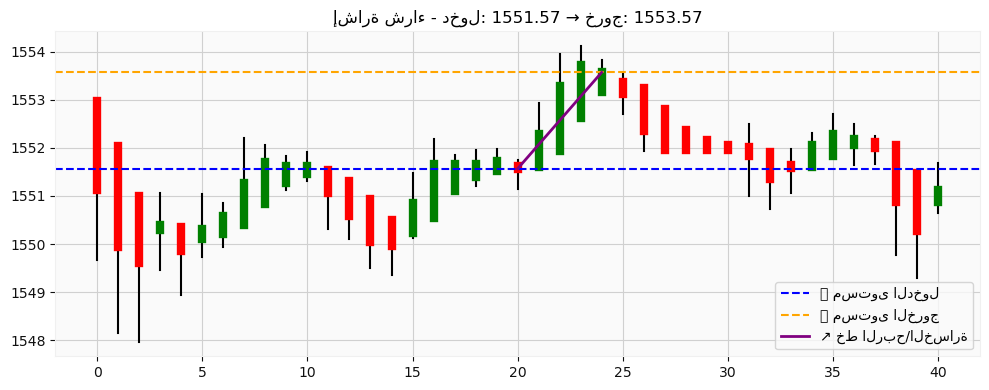

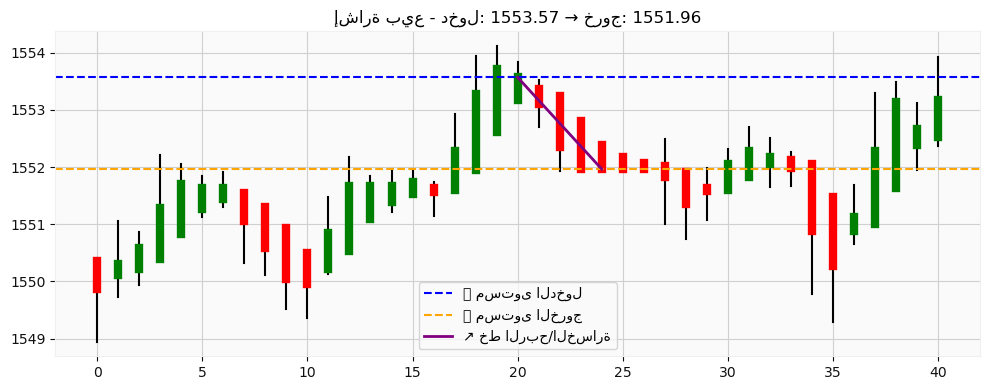

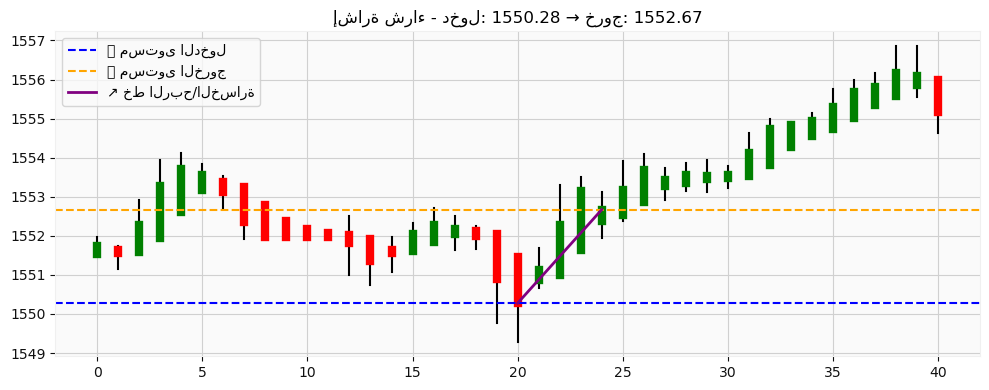

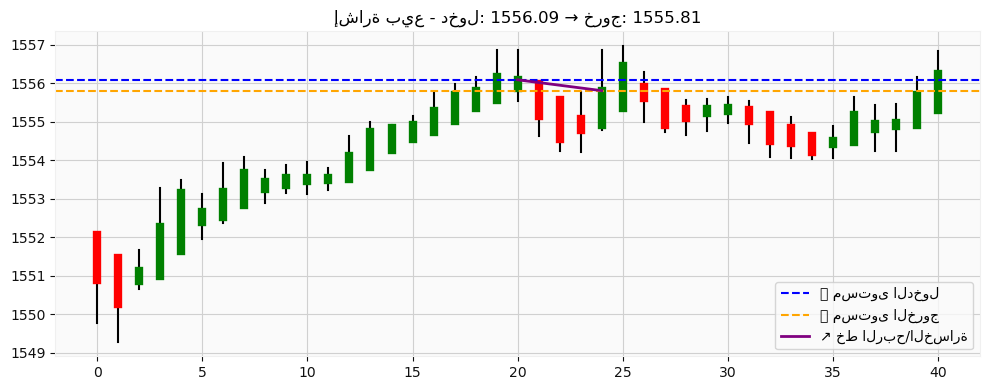

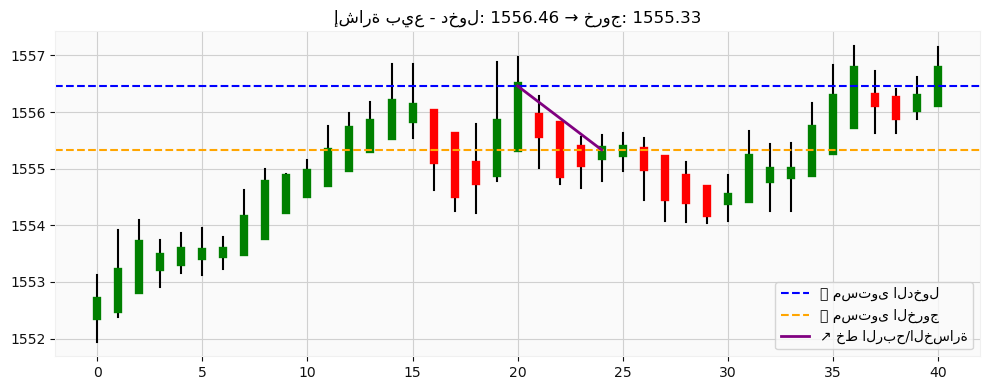

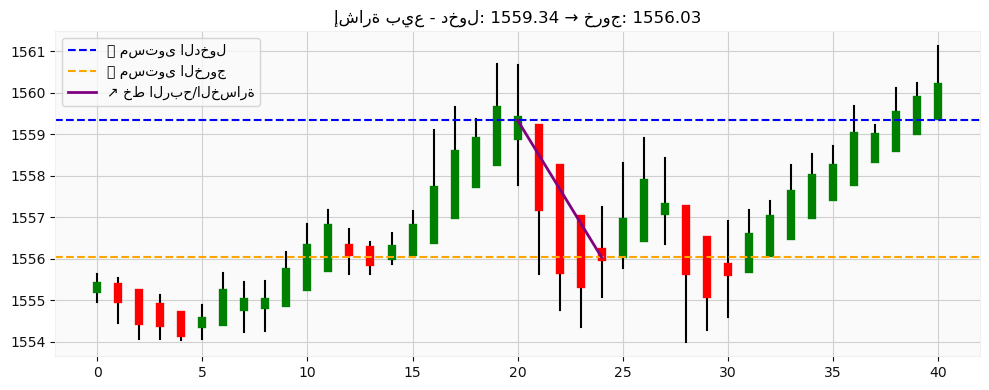

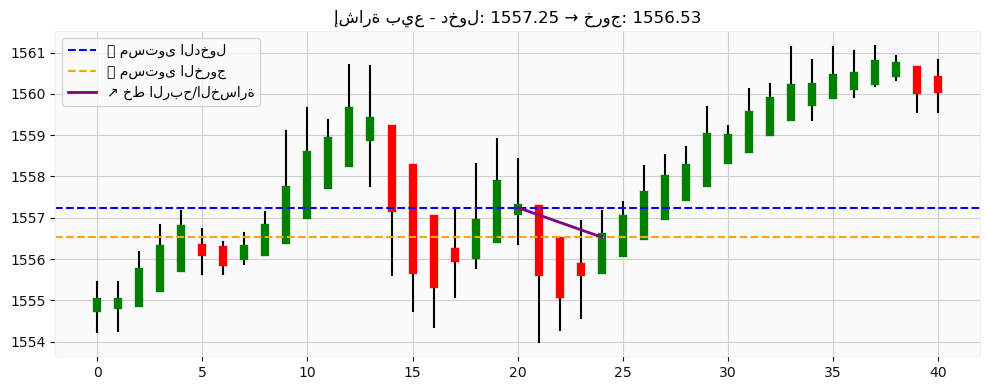

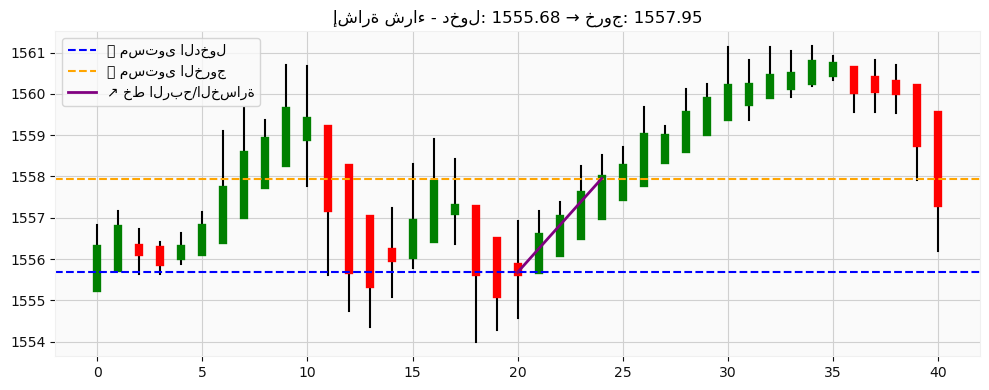

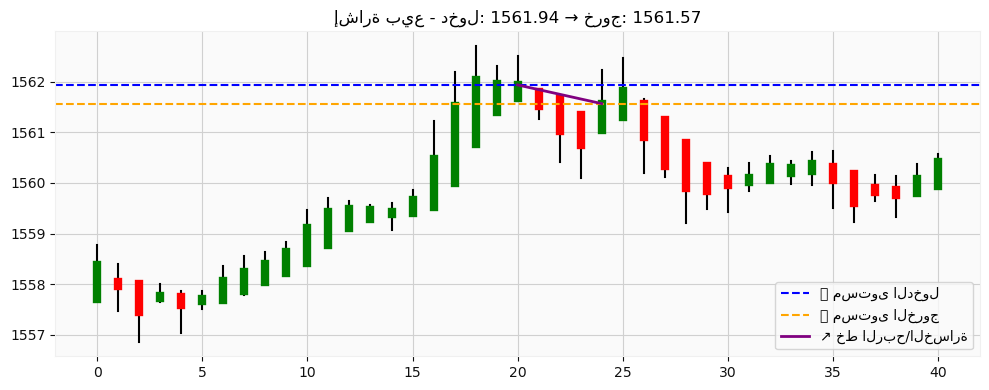

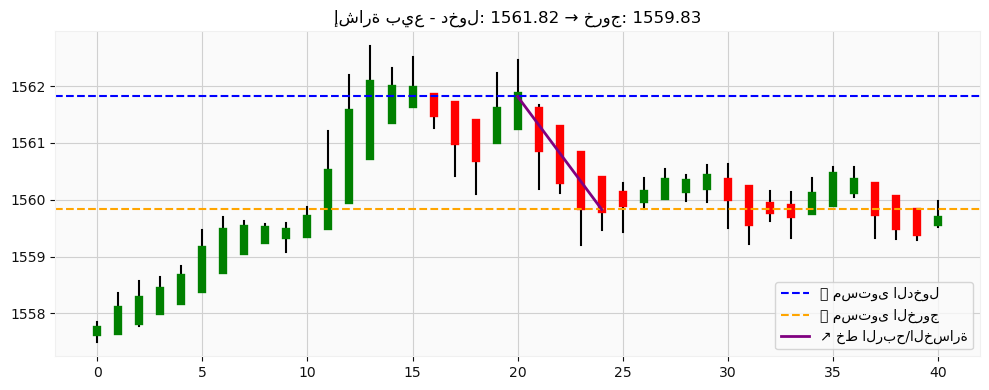

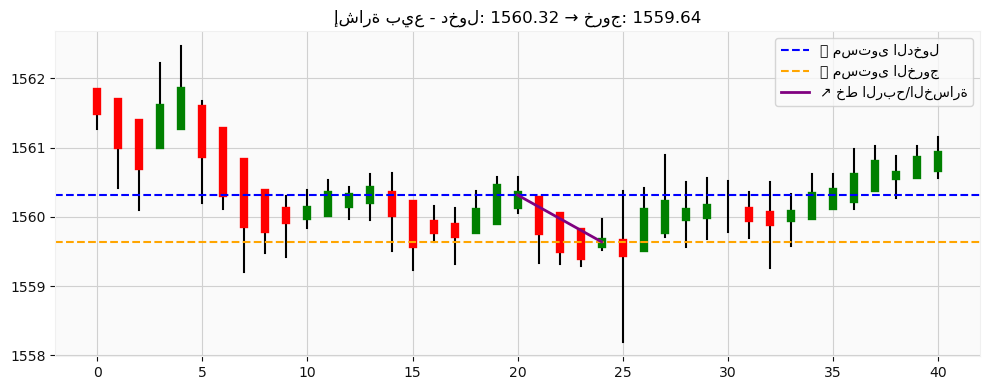

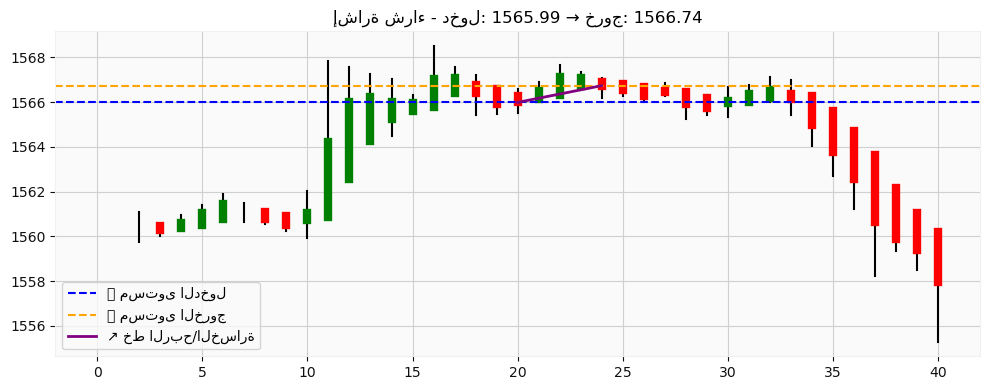

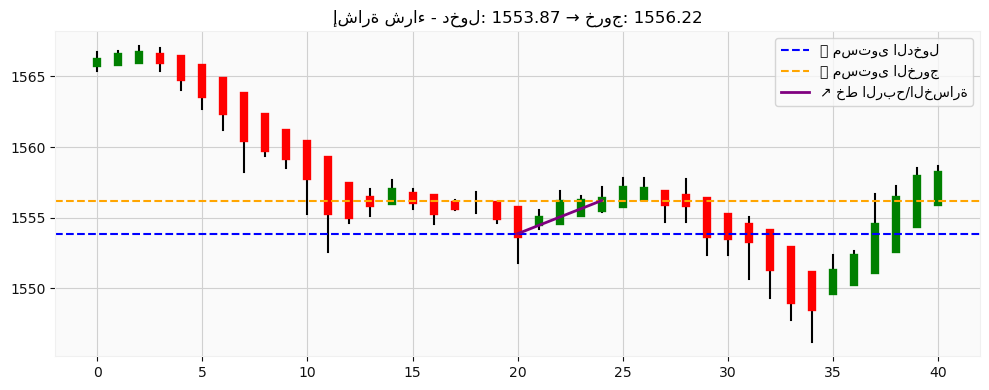

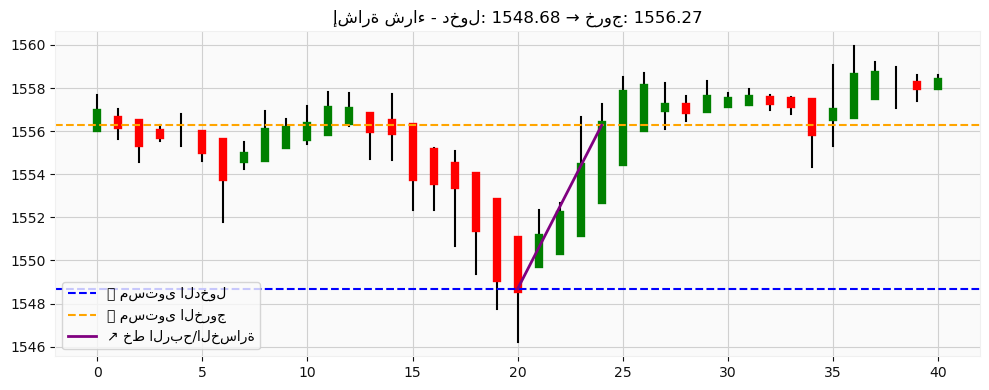

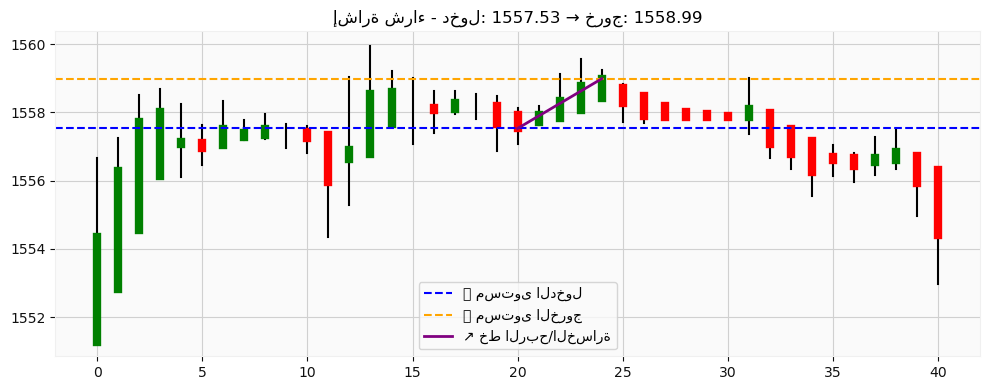

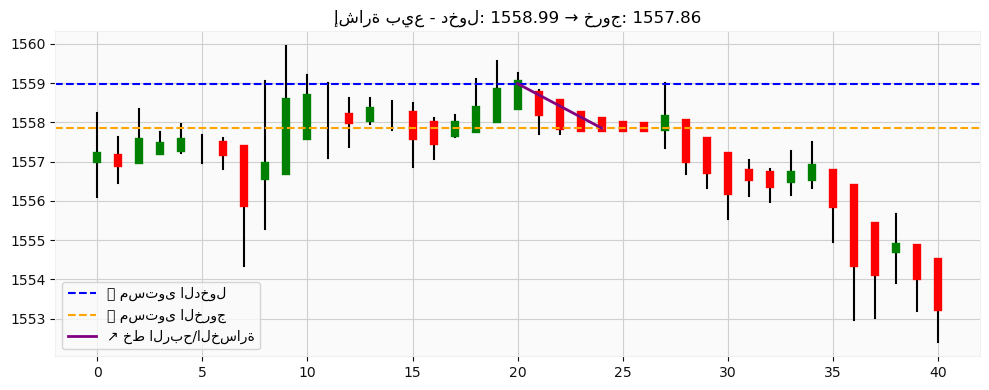

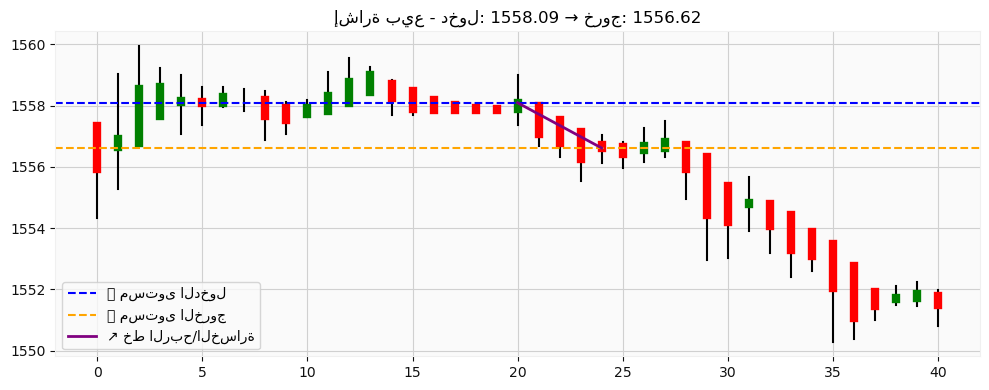

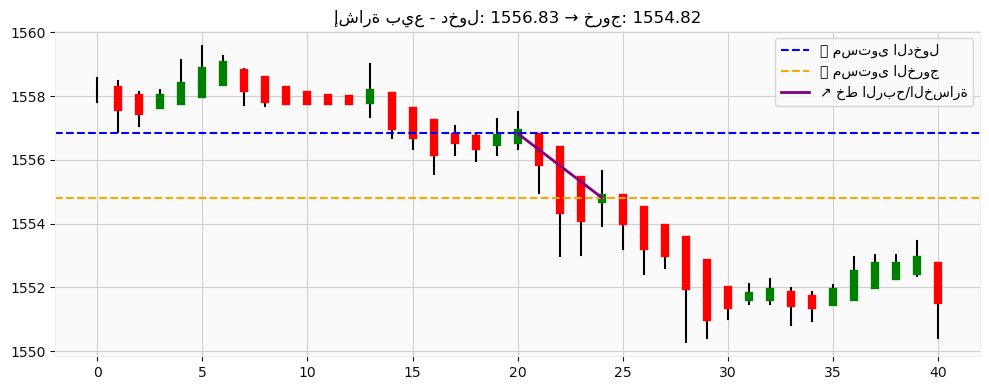

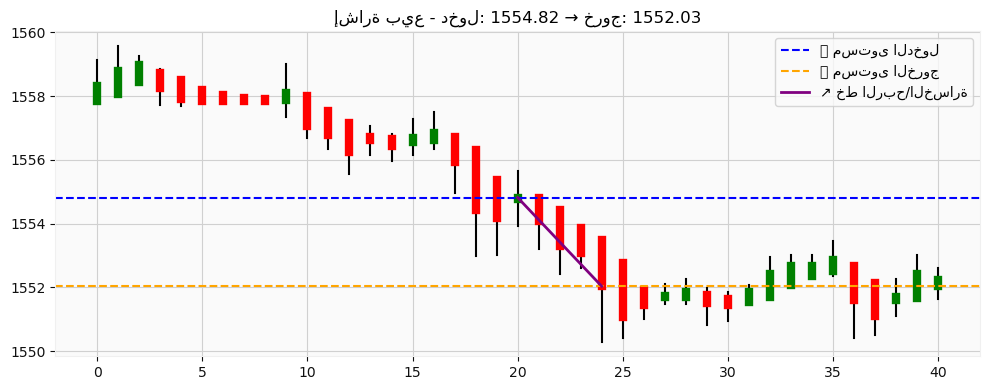

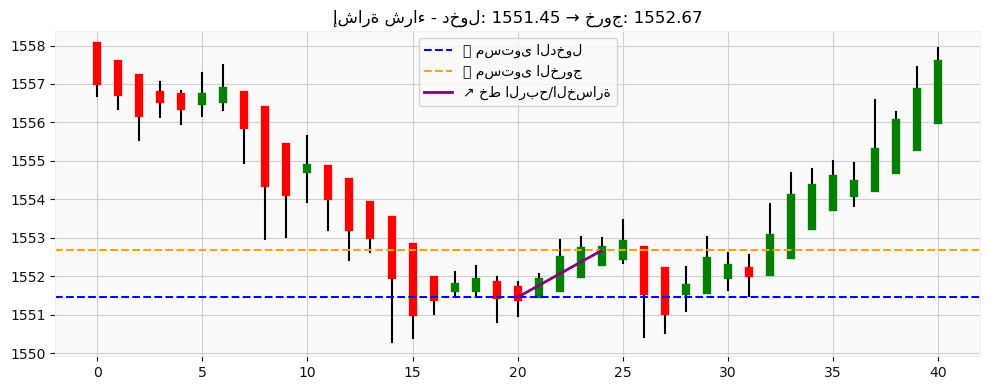

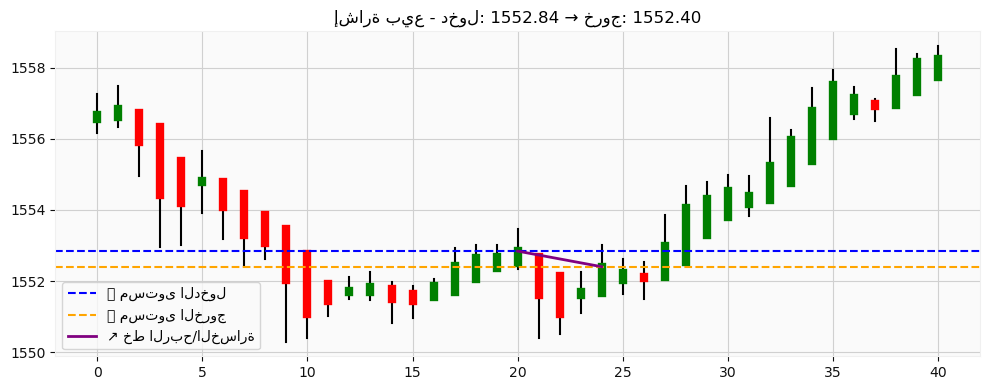

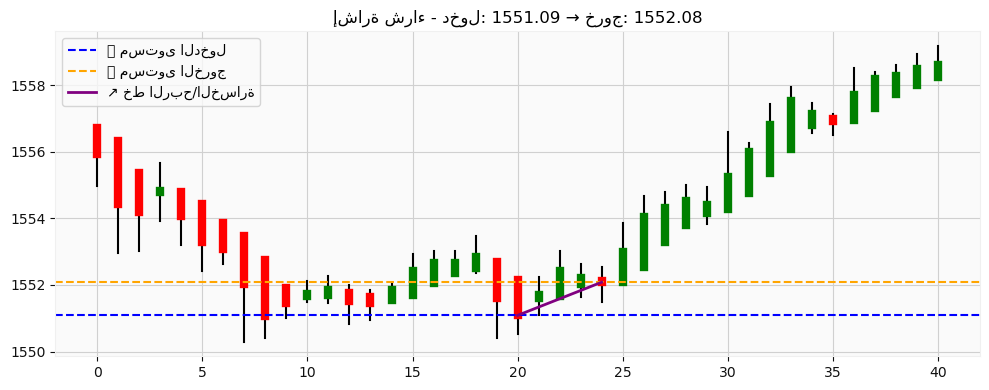

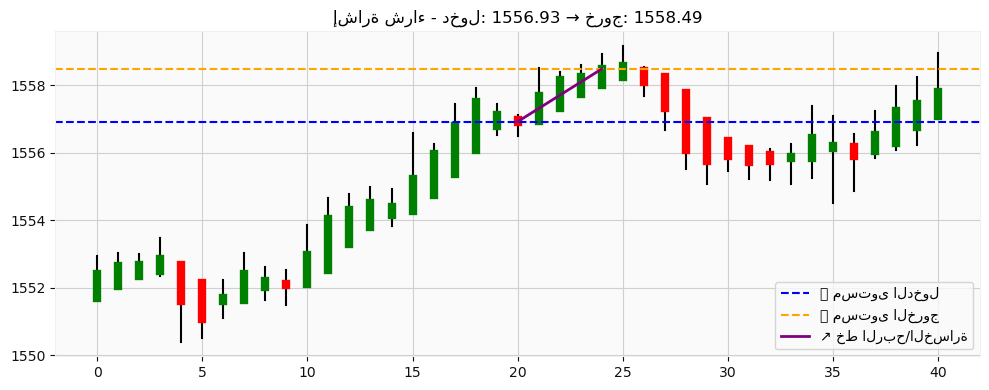

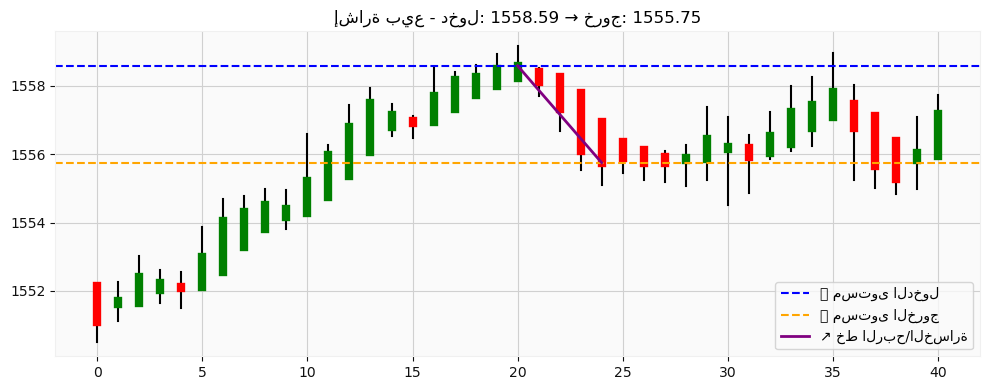

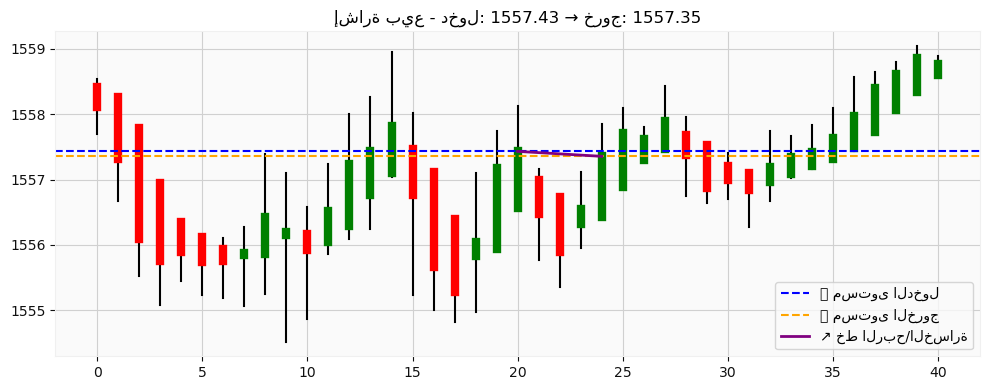

In [115]:
plot_entry_exit_examples(ha_df, signal_column='Signal', num_examples=100, window=20, hold_candles=4)
